## The goal of collecting this dataset:
The goal of collecting the Student Stress Factors dataset is to conduct a comprehensive analysis of the factors contributing to student stress, with a focus on classifying students into different stress levels and clustering them based on common stress-related characteristics. By examining variables such as academic workload, personal life, social pressures, and mental health, this dataset aims to identify patterns and relationships that can classify students’ stress levels. Additionally, clustering techniques will be used to group students with similar stress profiles, which can provide insights for developing targeted strategies to reduce stress, improve well-being, and enhance academic performance.

## The source of the dataset:
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

In [31]:
import pandas as pd
df = pd.read_csv('Dataset/Original_dataset.csv')

## General information about the dataset:
Number of attributes: 21
Number of objects: 1100
Attribute types: All columns are integer types (int64)
## General information about the dataset:
Number of attributes: 21

Number of objects: 1100

Attribute types: All columns are integer types (int64)

Class label: stress_level

In [32]:
num_objects = len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})
print("Number of attributes:" ,len(df.columns))
print()
print("Attributes and their types:")
print(attributes_info)
print()
print("Number of objects: ",num_objects)

Number of attributes: 21

Attributes and their types:
                  Attribute Name Data Type
0                  anxiety_level     int64
1                    self_esteem     int64
2          mental_health_history     int64
3                     depression     int64
4                       headache     int64
5                 blood_pressure     int64
6                  sleep_quality     int64
7              breathing_problem     int64
8                    noise_level   float64
9              living_conditions   float64
10                        safety     int64
11                   basic_needs     int64
12          academic_performance     int64
13                    study_load   float64
14  teacher_student_relationship     int64
15        future_career_concerns     int64
16                social_support     int64
17                 peer_pressure     int64
18    extracurricular_activities     int64
19                      bullying     int64
20                  stress_level     int64


#### Check the Current Distribution of the Class Label:


In [33]:
# Check the current distribution of the class label

# Use value_counts to get the count of each unique value in the 'stress_level' column
# Set normalize=True to get the relative frequencies as percentages, multiplied by 100
class_distribution = df['stress_level'].value_counts(normalize=True) * 100
print("Class label distribution in the full dataset:") # Print a message to describe the output
print(class_distribution) # Display the distribution of the class labels in percentages

Class label distribution in the full dataset:
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


### Graphs:


#### Bar char (Stress Level):

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


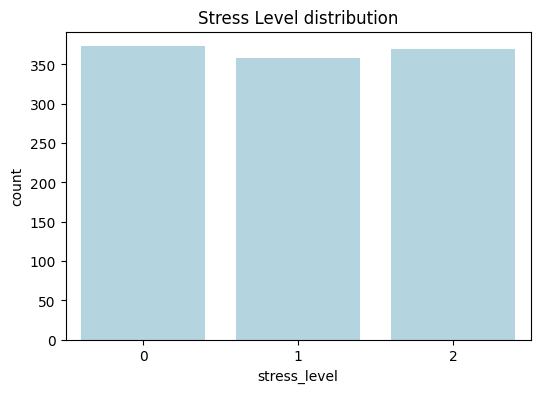

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the class distribution (counts of each class label)
print(class_distribution)
plt.figure(figsize=(6, 4)) # Set up the figure size for the plot
sns.countplot(x='stress_level', data=df, color='lightblue') # Use Seaborn's countplot to plot the distribution of the 'stress_level' column
plt.title('Stress Level distribution') # Set the title of the plot
plt.show() # Display the plot

This bar chart indicates that the dataset has an equal distribution of data across all stress levels, where 0 represents low stress, 1 stands for medium stress, and 2 indicates high stress. This balance is crucial for ensuring the integrity of analysis and predictions, as it prevents class imbalance that can distort results or cause predictive models to become biased. In an imbalanced dataset, models may disproportionately favor the majority class (e.g., "low stress"), leading to inaccurate and unfair predictions for underrepresented categories (e.g., "high stress"). The balanced representation in this dataset ensures more reliable and fair predictions, allowing for better understanding and intervention across all stress levels, thereby promoting effective strategies for managing student stress.

#### Pie chart (Social Support):

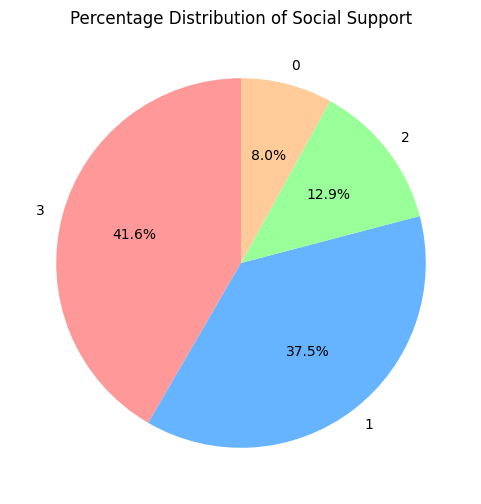

In [35]:
data2 = df['social_support'].value_counts(normalize=True) * 100 # Calculate the percentage distribution of the 'social_support' column
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 
data2.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors=custom_colors) # Plot the percentage distribution as a pie chart
plt.title('Percentage Distribution of Social Support') # Set the title of the pie chart
plt.ylabel('') # Remove the y-axis label for a cleaner pie chart presentation
plt.show() # Display the pie chart

The pie chart reveals that the majority of students (over 70%) experience either low or high levels of social support, with the largest percentage (41.6%) feeling well-supported. This suggests that many students have access to strong social networks, which can play a critical role in their academic success and mental health. However, around 8% of students report having no support, which is concerning. A lack of social support can significantly impact a student’s ability to manage stress, maintain motivation, and succeed academically. Addressing this issue through targeted interventions, such as peer mentoring, counseling services, or group activities, could help those with little to no support build stronger connections and improve their overall well-being. Understanding these different levels of social support is key to developing strategies that support students’ academic performance and mental health.

#### Box plot (Bullying):

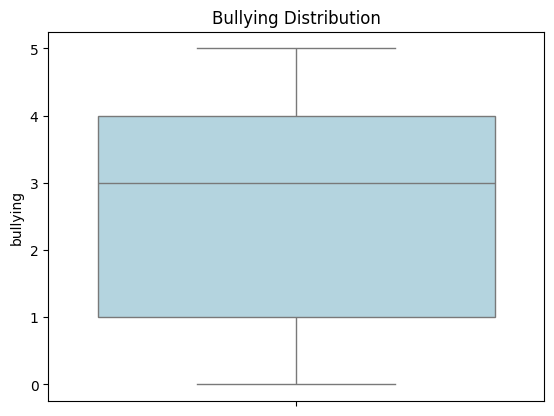

In [36]:
# Create a box plot for the 'bullying' column in the dataset
sns.boxplot(data=df['bullying'], color='lightblue')
plt.title('Bullying Distribution') # Set the title for the plot
plt.show() # Display the plot

The box plot shows the distribution of the "bullying" variable, with the interquartile range (IQR) captured by the box, and the 25th and 75th percentiles at the edges. The median bullying level is around 3, as indicated by the line inside the box. The whiskers extend to the minimum and maximum values, showing that most data points lie between 1 and 5, with no significant outliers. This distribution suggests that bullying incidents are relatively common in the population, with most students experiencing moderate levels of bullying. The lack of outliers indicates that extreme cases are rare, and interventions may need to focus on addressing the more typical experiences of bullying rather than isolated severe incidents. Understanding this spread is crucial for tailoring prevention and support programs.

#### Histogram (Stress level, Academic performance)

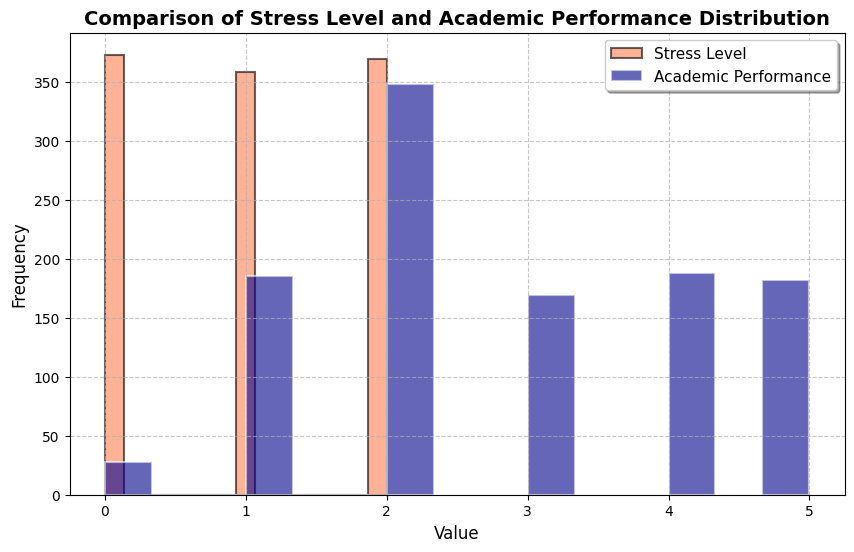

In [37]:
plt.figure(figsize=(10, 6)) # Set the figure size for the histogram
plt.hist(df['stress_level'], 
         bins=15,                 # Number of bins for the histogram
         color='coral',          # Color for the Stress Level histogram
         edgecolor='black',      # Color of the bin edges
         alpha=0.6,              # Transparency level of the histogram
         label='Stress Level',    # Label for the legend
         histtype='stepfilled',   # Style of the histogram
         linewidth=1.5)          # Width of the bin edges

plt.hist(df['academic_performance'], 
         bins=15,                 # Number of bins for the histogram
         color='darkblue',       # Color for the Academic Performance histogram
         edgecolor='white',      # Color of the bin edges
         alpha=0.6,              # Transparency level of the histogram
         label='Academic Performance', # Label for the legend
         histtype='stepfilled',   # Style of the histogram
         linewidth=1.5)          # Width of the bin edges

plt.title('Comparison of Stress Level and Academic Performance Distribution', fontsize=14, fontweight='bold')  # Title of the plot
plt.xlabel('Value', fontsize=12)        # X-axis label
plt.ylabel('Frequency', fontsize=12)    # Y-axis label
plt.grid(True, linestyle='--', alpha=0.7)  # Style of the gridlines
plt.legend(frameon=True, fancybox=True, shadow=True, loc='upper right', fontsize=11)  # Legend properties

# Display the histogram
plt.show()


Based on the histogram illustrating the relationship between stress level and academic performance, it is clear that students with higher academic achievement tend to exhibit elevated stress levels. This trend indicates that as students strive for better grades and higher academic standing, they often encounter increased pressure and demands associated with their studies. 

#### Scater plot(Anxiety Level, Self esteem)

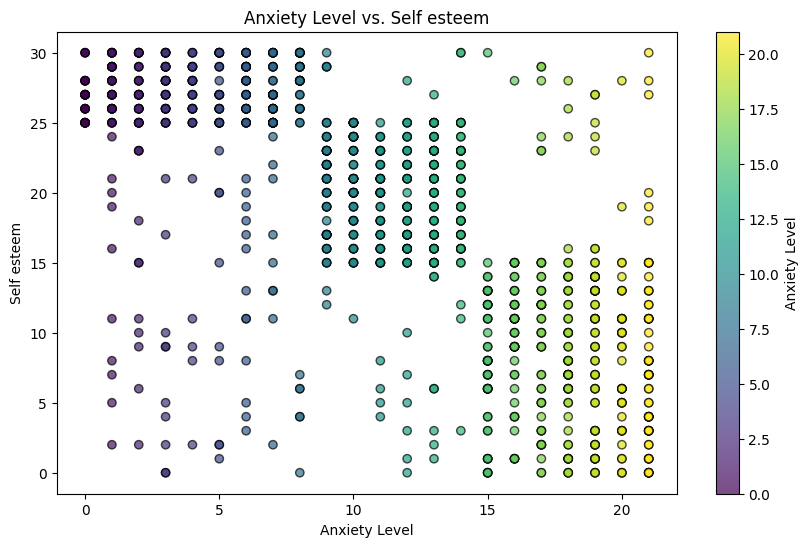

In [38]:
plt.figure(figsize=(10, 6))  # Set the figure size for the scatter plot

# Normalize the anxiety level for color mapping
norm = plt.Normalize(df['anxiety_level'].min(), df['anxiety_level'].max())

# Create a scatter plot with colors based on anxiety levels
scatter = plt.scatter(df['anxiety_level'], df['self_esteem'], 
                      c=df['anxiety_level'],  # Color based on anxiety levels
                      cmap='viridis',         # Colormap to use
                      norm=norm,              # Normalize values for colormap
                      alpha=0.7,             # Set transparency of points
                      edgecolor='black')      # Outline color for points

plt.title('Anxiety Level vs. Self esteem')  # Set the title for the scatter plot to describe the data being represented
plt.xlabel('Anxiety Level')  # Label the x-axis to indicate that it represents anxiety levels
plt.ylabel('Self esteem')  # Label the y-axis to indicate that it represents depression levels
cbar = plt.colorbar(scatter) # Add a colorbar to indicate the mapping of colors to anxiety levels
cbar.set_label('Anxiety Level')  # Label for the color bar

plt.show() 



This plot illustrates a negative relationship between anxiety level and self-esteem, suggesting that as anxiety levels increase, self-esteem tends to decrease. This finding aligns with expectations in psychological studies, where heightened anxiety is often associated with lower self-worth and confidence. The observed pattern indicates a potential link between these variables in your data, highlighting the importance of addressing anxiety to promote healthier self-esteem levels. Further analysis on the correlation between anxiety and self-esteem, as well as the potential causation, may be warranted to understand the dynamics of these relationships better and to develop effective interventions.

### Statistical summaries:

In [39]:
summary_stats=df.describe()
print(summary_stats)

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

### By using the df.describe() function, we obtain these results.

#### Anxiety Levels
The dataset includes 1,100 entries on anxiety levels, revealing an average score of approximately 11.06, with a standard deviation of 6.12. Anxiety levels range from a minimum of 0 to a maximum of 21, with most individuals scoring between 6 and 16.

#### Self-Esteem
In terms of self-esteem, there are also 1,100 entries. The average self-esteem score is about 17.78, with a standard deviation of 8.94. Scores range from 0 to 30, predominantly falling between 11 and 26.

#### Mental Health History
Regarding mental health history, roughly 49.27% of the individuals in the dataset reported having a history of mental health issues, while 50.73% did not.

#### Depression Levels
The dataset includes 1,100 instances related to depression levels, with an average score of approximately 12.56 and a standard deviation of 7.73. Scores range from 0 to 27, with most values falling between 6 and 19.

#### Headache Reports
There are 1,100 records of reported headache levels, showing an average score of about 2.51, with a standard deviation of 1.41. The headache scores range from 0 to 5, with the majority of responses clustering between 1 and 3.

#### Blood Pressure Levels
The dataset contains 1,100 blood pressure readings, with an average score of approximately 2.18 and a standard deviation of 0.83. The scores range from 1 to 3, with most individuals scoring either 1 or 2.

#### Sleep Quality
For sleep quality, the dataset shows 1,100 instances, with an average score of about 2.66 and a standard deviation of 1.55. Sleep quality scores range from 0 to 5, and most individuals scored between 1 and 4.

#### Breathing Problems
The dataset includes 1,100 reports on breathing problems, revealing an average score of approximately 2.75 and a standard deviation of 1.40. Scores range from 0 to 5, with most individuals reporting scores between 2 and 4.

#### Noise Levels
Regarding noise levels, there are 1,100 entries in the dataset, with an average score of about 2.65 and a standard deviation of 1.33. The noise level scores range from 0 to 5, with the majority falling between 2 and 3.

#### Living Conditions
The dataset contains 1,100 instances of living conditions, showing an average score of approximately 2.52 with a standard deviation of 1.12. Scores range from 0 to 5, with most individuals reporting either a score of 2 or 3.

#### Safety Levels
There are 1,100 records of safety levels, with an average score of about 2.78 and a standard deviation of 1.51. The scores range from 0 to 5, with most responses clustered between 2 and 4.

#### Basic Needs Satisfaction
Finally, the dataset includes 1,100 instances regarding satisfaction with basic needs, revealing an average score of approximately 2.77 and a standard deviation of 1.43. Scores range from 0 to 5, with most individuals scoring between 2 and 4.

## Data Preprocessing:

### Handling Duplicates

Duplicate rows in a dataset can introduce redundancy, skewing the analysis and leading to inaccurate results. In this step, we checked for and removed any duplicate rows using the duplicated() function. This ensures that each data point is unique, preserving the quality and integrity of the dataset.

In [40]:
# Handling Duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Remove duplicates and save the cleaned dataset
df = df.drop_duplicates()

# Save after handling duplicates
df.to_csv('Cleaned_Dataset.csv', index=False)

Number of duplicate rows: 0


#### Result:

Upon checking the dataset, the result showed 0 duplicate rows, meaning that no redundant data points were found. The dataset is clean, and no further action regarding duplicates was necessary

### Missing values:

In [41]:
# Check for missing values
missing_values = df.isnull().sum() # This creates a Series containing the count of missing values per column
print("Missing values per column:") # Print a message indicating that missing values will be displayed
print(missing_values) # Print missing values per column

Missing values per column:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


Result:

The results show that there are **no missing values** in any of the columns in the dataset. This indicates that the dataset is fully populated and no imputation or removal of rows/columns due to missing data is required, making it well-suited for further analysis or modeling without needing to handle missing values.

### Handling Outliers:

Outliers are extreme values that can impact the accuracy of data analysis. To address this, we used the Interquartile Range (IQR) method, which identifies outliers by looking for values significantly above or below the normal range in numeric columns. Instead of removing these outliers, we cap their values to minimize their influence while preserving the overall dataset structure.

In [42]:
data = pd.read_csv('Cleaned_Dataset.csv')
import numpy as np

# Outlier handling using IQR method
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

# Select numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Detect outliers in each numeric column
outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

# Print outlier summary
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
anxiety_level: 0 rows with outliers
self_esteem: 0 rows with outliers
mental_health_history: 0 rows with outliers
depression: 0 rows with outliers
headache: 0 rows with outliers
blood_pressure: 0 rows with outliers
sleep_quality: 0 rows with outliers
breathing_problem: 0 rows with outliers
noise_level: 0 rows with outliers
living_conditions: 0 rows with outliers
safety: 0 rows with outliers
basic_needs: 0 rows with outliers
academic_performance: 0 rows with outliers
study_load: 0 rows with outliers
teacher_student_relationship: 0 rows with outliers
future_career_concerns: 0 rows with outliers
social_support: 0 rows with outliers
peer_pressure: 0 rows with outliers
extracurricular_activities: 0 rows with outliers
bullying: 0 rows with outliers
stress_level: 0 rows with outliers
Total Rows with Outliers: 0


Result:

After applying the IQR method, no outliers were detected in any of the columns, as shown by the result where each column has 0 rows with outliers. This means that the dataset is clean, and no extreme values exist that could distort further analysis or modeling.

## Data Transformation


Encoding was not used because it is only necessary for categorical or textual data. Since the dataset contained numerical data, there was no need for encoding.


### Normalization
In the transformation process, Normalization was applied because the data consisted of numerical values that needed to be scaled to a specific range (typically 0 to 1). This ensures that features with different scales do not disproportionately influence machine learning models.

In [43]:
data = pd.DataFrame(data)
# Columns to normalize
columns_to_normalize = [
    'anxiety_level', 'self_esteem', 'depression', 'blood_pressure', 
    'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 
    'study_load', 'future_career_concerns', 'social_support', 'peer_pressure', 
    'extracurricular_activities', 'bullying', 'stress_level'
]

# Apply Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = data[column].abs().max()
    data[column] = data[column] / (10 ** len(str(int(max_abs_value))))

# Output the normalized data
print(data.head())

# Save the normalized dataset
data.to_csv('Cleaned_Dataset.csv', index=False)

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           0.14         0.20                      0        0.11         2   
1           0.15         0.08                      1        0.15         5   
2           0.12         0.18                      1        0.14         2   
3           0.16         0.12                      1        0.15         4   
4           0.16         0.28                      0        0.07         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.1            0.2                0.4          0.2   
1             0.3            0.1                0.4          0.3   
2             0.1            0.2                0.2          0.2   
3             0.3            0.1                0.3          0.4   
4             0.3            0.5                0.1          0.3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                0.3  ...            2        

#### Result:

As seen in the table, the values for variables such as anxiety_level, self_esteem, blood_pressure, and others have been normalized. For example, blood_pressure now ranges between 0 and 1, ensuring consistent scaling across all features. This allows for more balanced analysis and model training without certain features dominating due to larger magnitudes.

### Aggregation

Aggregation is a technique used to summarize data by grouping it based on specific categories. In this step, we grouped the dataset by stress_level and calculated the mean for numeric columns like anxiety_level, depression, and self_esteem. For categorical variables like bullying, we summed the values to provide insight into the total occurrences within each stress level group.

In [44]:
# Step 5: Aggregation based on stress_level
aggregated_df = data.groupby('stress_level').agg({
    'anxiety_level': 'mean',  
    'depression': 'mean',    
    'self_esteem': 'mean',    
    'bullying': 'sum'  # Example of sum for categorical variables
})

# Output aggregated data
print("Aggregated data:")
print(aggregated_df)

Aggregated data:
              anxiety_level  depression  self_esteem  bullying
stress_level                                                  
0.0                0.054316    0.060134     0.252520      46.8
0.1                0.114302    0.118743     0.192626      91.5
0.2                0.164011    0.198293     0.087805     149.6


Result:

The aggregated data shows the mean values of anxiety_level, depression, and self_esteem for each stress_level group, as well as the total number of bullying incidents. For instance, individuals with a stress_level of 2 have a higher mean anxiety_level (16.40) and depression (19.83) compared to those with a stress_level of 0. This helps identify patterns and correlations between stress levels and various psychological and behavioral metric

### Discretization

Discretization is a process where continuous data is divided into discrete categories or bins. In this step, we transformed the anxiety_level variable into three categories: Low, Medium, and High. This simplifies the data and makes it easier to analyze trends across different levels of anxiety.

In [45]:
# Discretization of anxiety_level into categories
data['anxiety_level'] = pd.cut(data['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])

# Save the discretized dataset
data.to_csv('Cleaned_Dataset.csv', index=False)

# Display the first few rows
print("Data after discretization:")
print(data[['anxiety_level']].head())

Data after discretization:
  anxiety_level
0          High
1          High
2        Medium
3          High
4          High


#### Result:

The anxiety_level column has been discretized into the bins Low, Medium, and High. For example, a anxiety_level of 14 is classified as Medium, while a value of 16 is classified as High. This categorization helps in interpreting the data more intuitively and allows for easier comparisons across different groups.

## Feature Selection
The number of available features is 20, and the feature selection includes blood pressure, sleep quality, future career concerns, bullying, and stress level.
 

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif 

# Define the target column (class label)
class_label = 'stress_level'
# Separate features from target variable
X = df.drop(columns=[class_label])  # Features
y = df[class_label]  # The target column y should be the class label
# Check the number of features
n_features = X.shape[1] # The number of columns in X represents the number of features
print(' Number of features available :', n_features) # Print the number of features

# Specify the number of features to choose
num_features_to_select = min(5, n_features)  # Choose the least between 5 and the actual number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select) # Set up SelectKBest with appropriate function and k selection
X_selected = selector.fit_transform(X, y)  # Apply feature selection to the data

# Get selected feature indicators
selected_indices = selector.get_support(indices=True) # Get indicators of selected features

# Get selected feature names
selected_features = X.columns[selected_indices] # Use pointers to get the names of the selected features

print('Selected Features:', selected_features) # Print the names of the selected features

 Number of features available : 20
Selected Features: Index(['self_esteem', 'blood_pressure', 'sleep_quality',
       'future_career_concerns', 'bullying'],
      dtype='object')


### Loading Data

In [47]:
#Load data
import pandas as pd
data=pd.read_csv('Cleaned_Dataset.csv')
print(data)

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             High         0.20                      0        0.11         2   
1             High         0.08                      1        0.15         5   
2           Medium         0.18                      1        0.14         2   
3             High         0.12                      1        0.15         4   
4             High         0.28                      0        0.07         2   
...            ...          ...                    ...         ...       ...   
1095        Medium         0.17                      0        0.14         3   
1096        Medium         0.12                      0        0.08         0   
1097           Low         0.26                      0        0.03         1   
1098          High         0.00                      1        0.19         5   
1099          High         0.06                      1        0.15         3   

      blood_pressure  sleep_quality  br

## Classification

#### Importing required libraries:

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#### Loding data:

In [51]:
data = pd.read_csv('Dataset/Processed_dataset.csv')
print(data)

      Anxiety_levelA anxiety_level  self_esteem  mental_health_history  \
0               0.14          High         0.20                      0   
1               0.15          High         0.08                      1   
2               0.12        Medium         0.18                      1   
3               0.16          High         0.12                      1   
4               0.16          High         0.28                      0   
...              ...           ...          ...                    ...   
1095            0.11        Medium         0.17                      0   
1096            0.09        Medium         0.12                      0   
1097            0.04           Low         0.26                      0   
1098            0.21          High         0.00                      1   
1099            0.18          High         0.06                      1   

      depression  headache  blood_pressure  sleep_quality  breathing_problem  \
0           0.11         2     

### Information Gain (entropy)

1. ### Small (60% train, 40% test)

In [52]:
# Encoding the 'anxiety_level' column
le = LabelEncoder()
data['anxiety_level'] = le.fit_transform(data['anxiety_level'])

# Feature Selection
fn1 = data.keys().tolist()[:-1]
X1 = data[fn1]
y1 = data['stress_level']

# Encode target variable to numerical values
le1 = LabelEncoder()
y_encoded1 = le1.fit_transform(y1)

# Splitting Data into 60% training and 40% testing subsets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_encoded1, test_size=0.4, random_state=1)

# Building decision tree model
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train Decision Tree Classifier
clf1 = clf1.fit(X_train1, y_train1)

# Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test1, y_pred1, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = recall_score(y_test1, y_pred1, average='weighted')  
print("Sensitivity:", sensitivity)

cm1 = confusion_matrix(y_test1, y_pred1)

# Calculate Specificity (Macro-Average for Multiclass)
specificity_per_class = []
for i in range(cm1.shape[0]):  # Loop through each class
    tn = cm1.sum() - (cm1[i, :].sum() + cm1[:, i].sum() - cm1[i, i])  # True Negatives
    fp = cm1[:, i].sum() - cm1[i, i]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)

# Compute Macro-Averaged Specificity
macro_specificity = sum(specificity_per_class) / len(specificity_per_class)
print("Macro-Averaged Specificity:", macro_specificity)

Accuracy: 0.884090909090909
Error Rate: 0.11590909090909096
Precision: 0.8867001943058211
Sensitivity: 0.884090909090909
Macro-Averaged Specificity: 0.9419024421379302


- #### Confusion matrix

[[139  10   6]
 [ 11 129   2]
 [  9  13 121]]


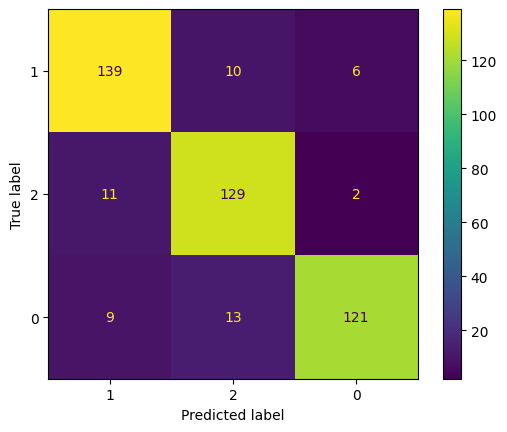

In [53]:
# Compute and print the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

from sklearn.metrics import ConfusionMatrixDisplay
cn1 = data['stress_level'].unique() # classes_names

class_labels1 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp1 = ConfusionMatrixDisplay.from_estimator(clf1, X_test1, y_test1, display_labels=cn1)

- #### Decision Tree:

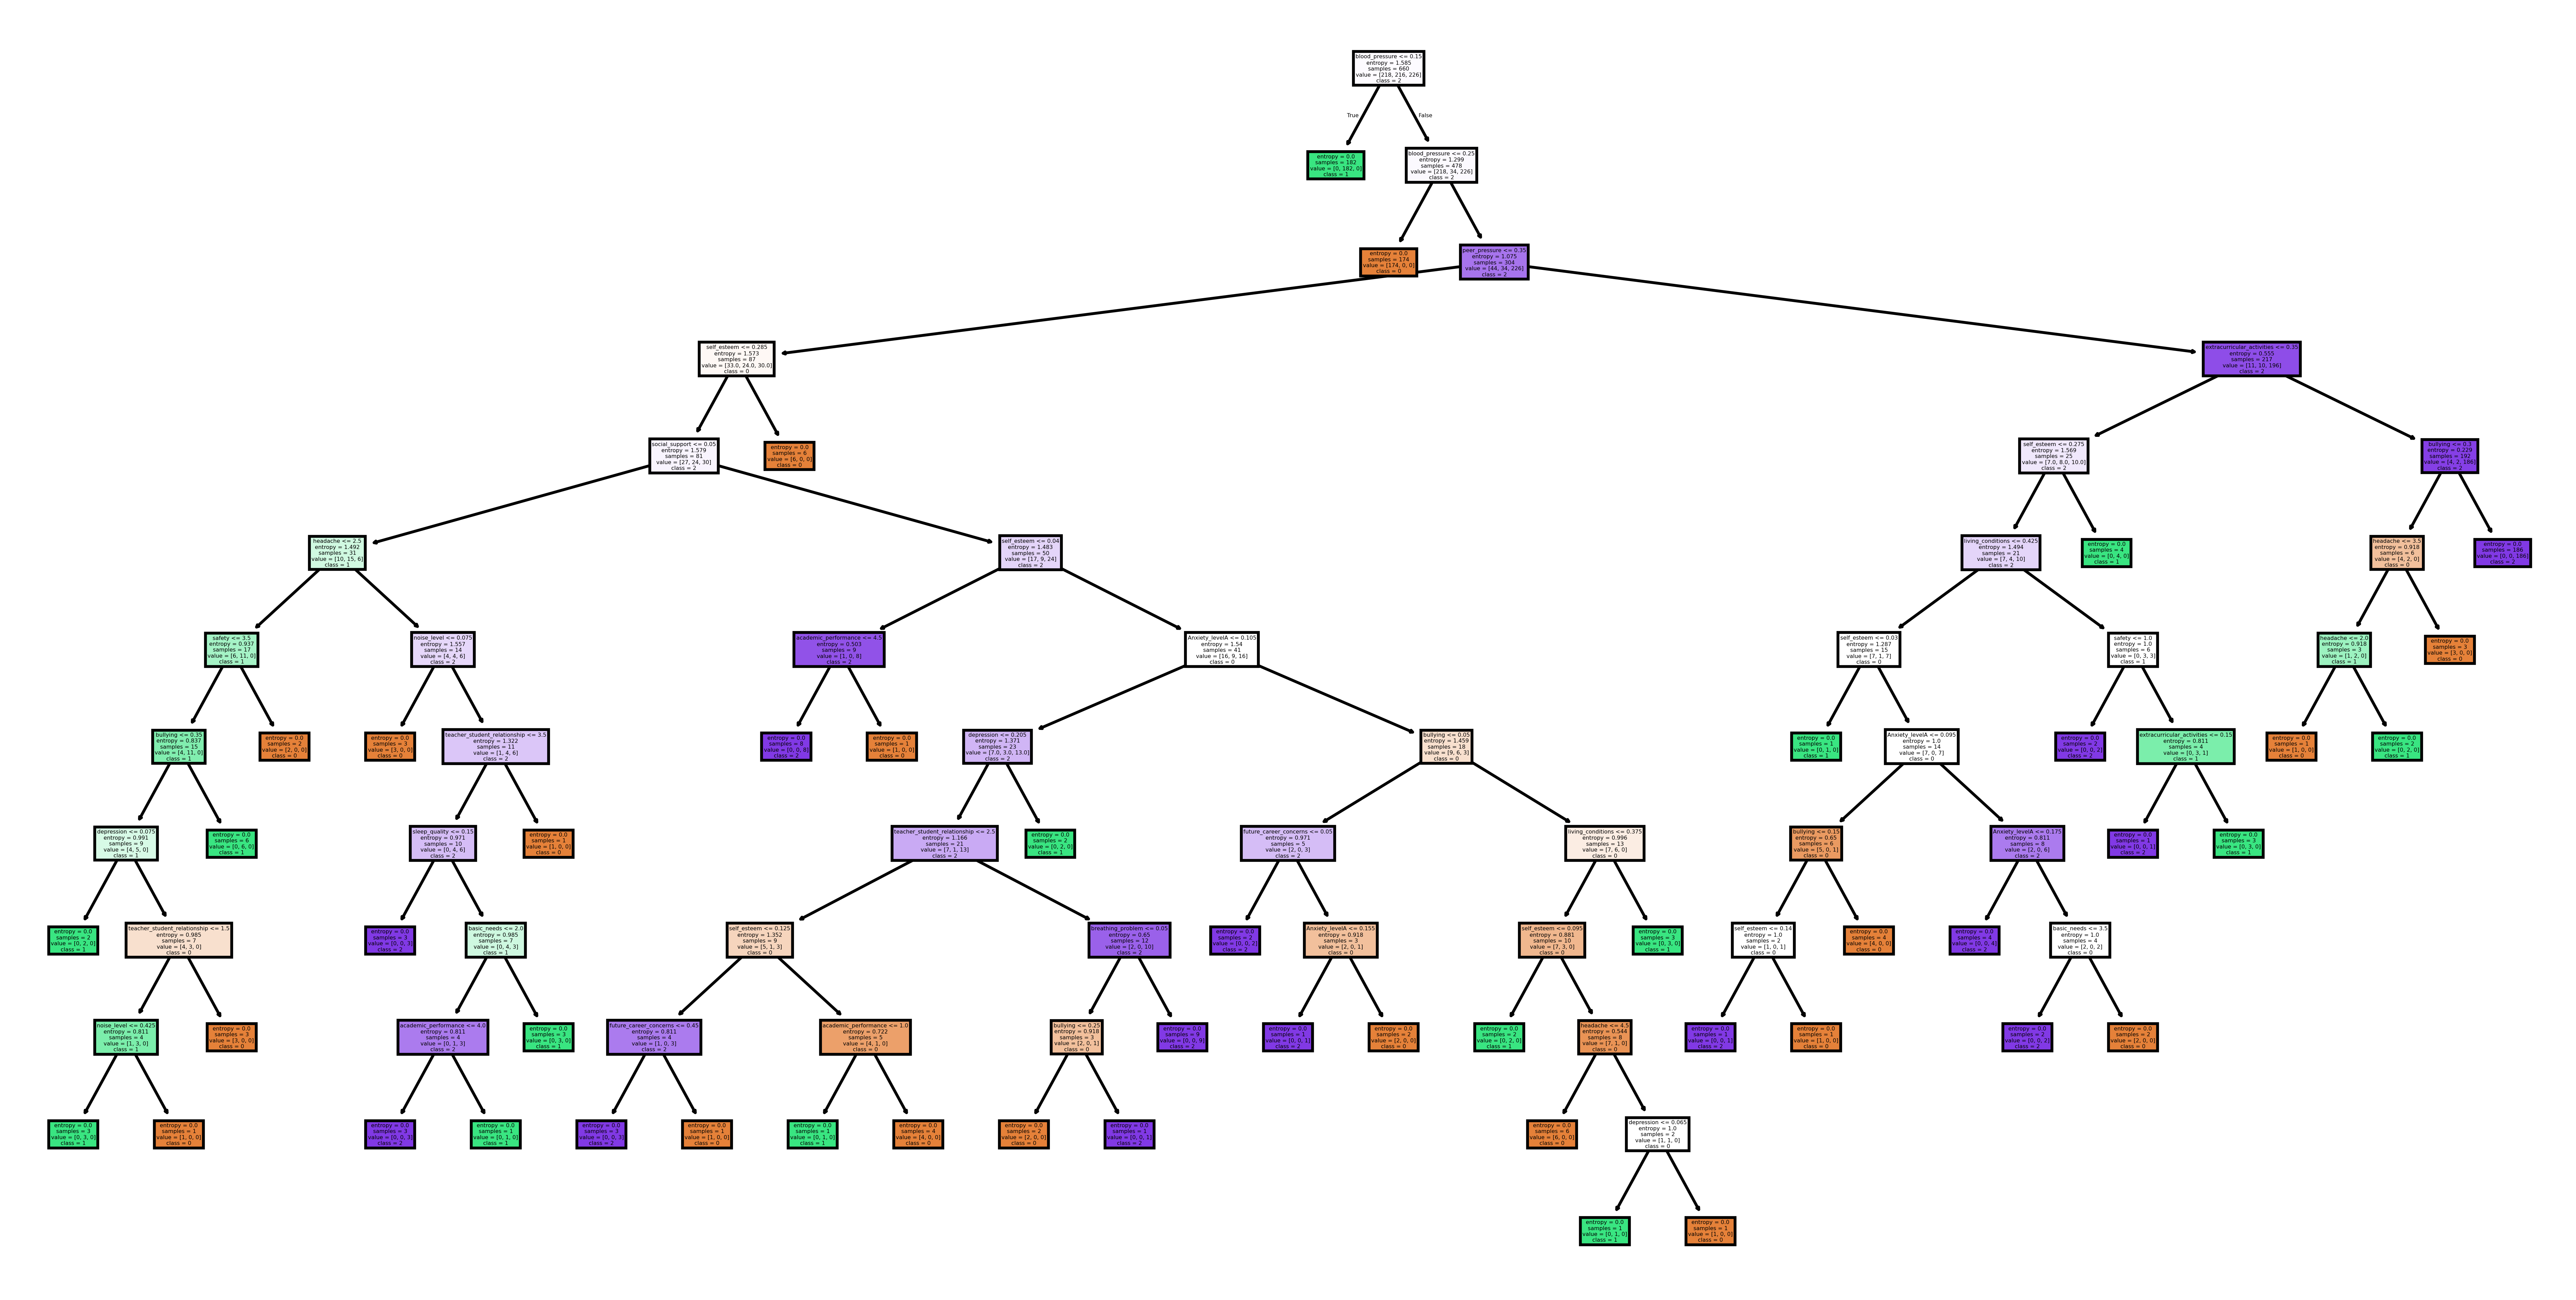

In [54]:
# Convert all feature columns to numeric types if applicable
for col in fn1:
    data[col] = pd.to_numeric(data[col], errors='coerce')



# Re-encode the target variable as strings for compatibility with plot_tree
le1 = LabelEncoder()
y1 = le1.fit_transform(data['stress_level'])
class_names1 = [str(class_label) for class_label in le1.classes_]

# Split dataset into features and target variable
X1 = data[fn1] # Features
y1 = le1.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# Train Decision Tree Classifier
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1.fit(X_train1, y_train1)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf1,
    feature_names=fn1,       # Ensure feature names are strings
    class_names=class_names1,  # Use encoded class names as strings
    filled=True,
)

# Display the plot
plt.show()



2. ### Medium (70% train, 30% test)

In [55]:
# Encoding the 'anxiety_level' column
le = LabelEncoder()
data['anxiety_level'] = le.fit_transform(data['anxiety_level'])

# Feature Selection
fn2 = data.keys().tolist()[:-1]
X2 = data[fn2]
y2 = data['stress_level']

# Encode target variable to numerical values
le2 = LabelEncoder()
y_encoded2 = le2.fit_transform(y2)

# Splitting Data into 70% training and 30% testing subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_encoded2, test_size=0.3, random_state=1)

# Building decision tree model
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train Decision Tree Classifier
clf2 = clf2.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred2)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test2, y_pred2, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = recall_score(y_test2, y_pred2, average='weighted')  
print("Sensitivity:", sensitivity)

# Compute the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)

# Calculate Specificity (Macro-Average for Multiclass)
specificity_per_class = []
for i in range(cm2.shape[0]):  # Loop through each class
    tn = cm2.sum() - (cm2[i, :].sum() + cm2[:, i].sum() - cm2[i, i])  # True Negatives
    fp = cm2[:, i].sum() - cm2[i, i]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)

# Compute Macro-Averaged Specificity
macro_specificity = sum(specificity_per_class) / len(specificity_per_class)
print("Macro-Averaged Specificity:", macro_specificity)


Accuracy: 0.8727272727272727
Error Rate: 0.12727272727272732
Precision: 0.8730967864485565
Sensitivity: 0.8727272727272727
Macro-Averaged Specificity: 0.9363115846673397


- #### Confusion matrix

[[99  9  6]
 [ 9 95  5]
 [ 5  8 94]]


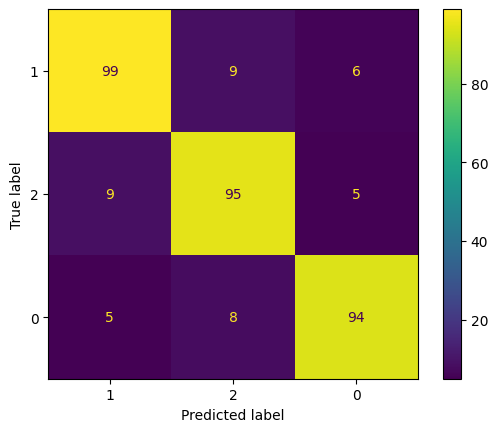

In [56]:
# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['stress_level'].unique() # classes_names

class_labels2 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp2 = ConfusionMatrixDisplay.from_estimator(clf2, X_test2, y_test2, display_labels=cn2)

- #### Decision Tree:

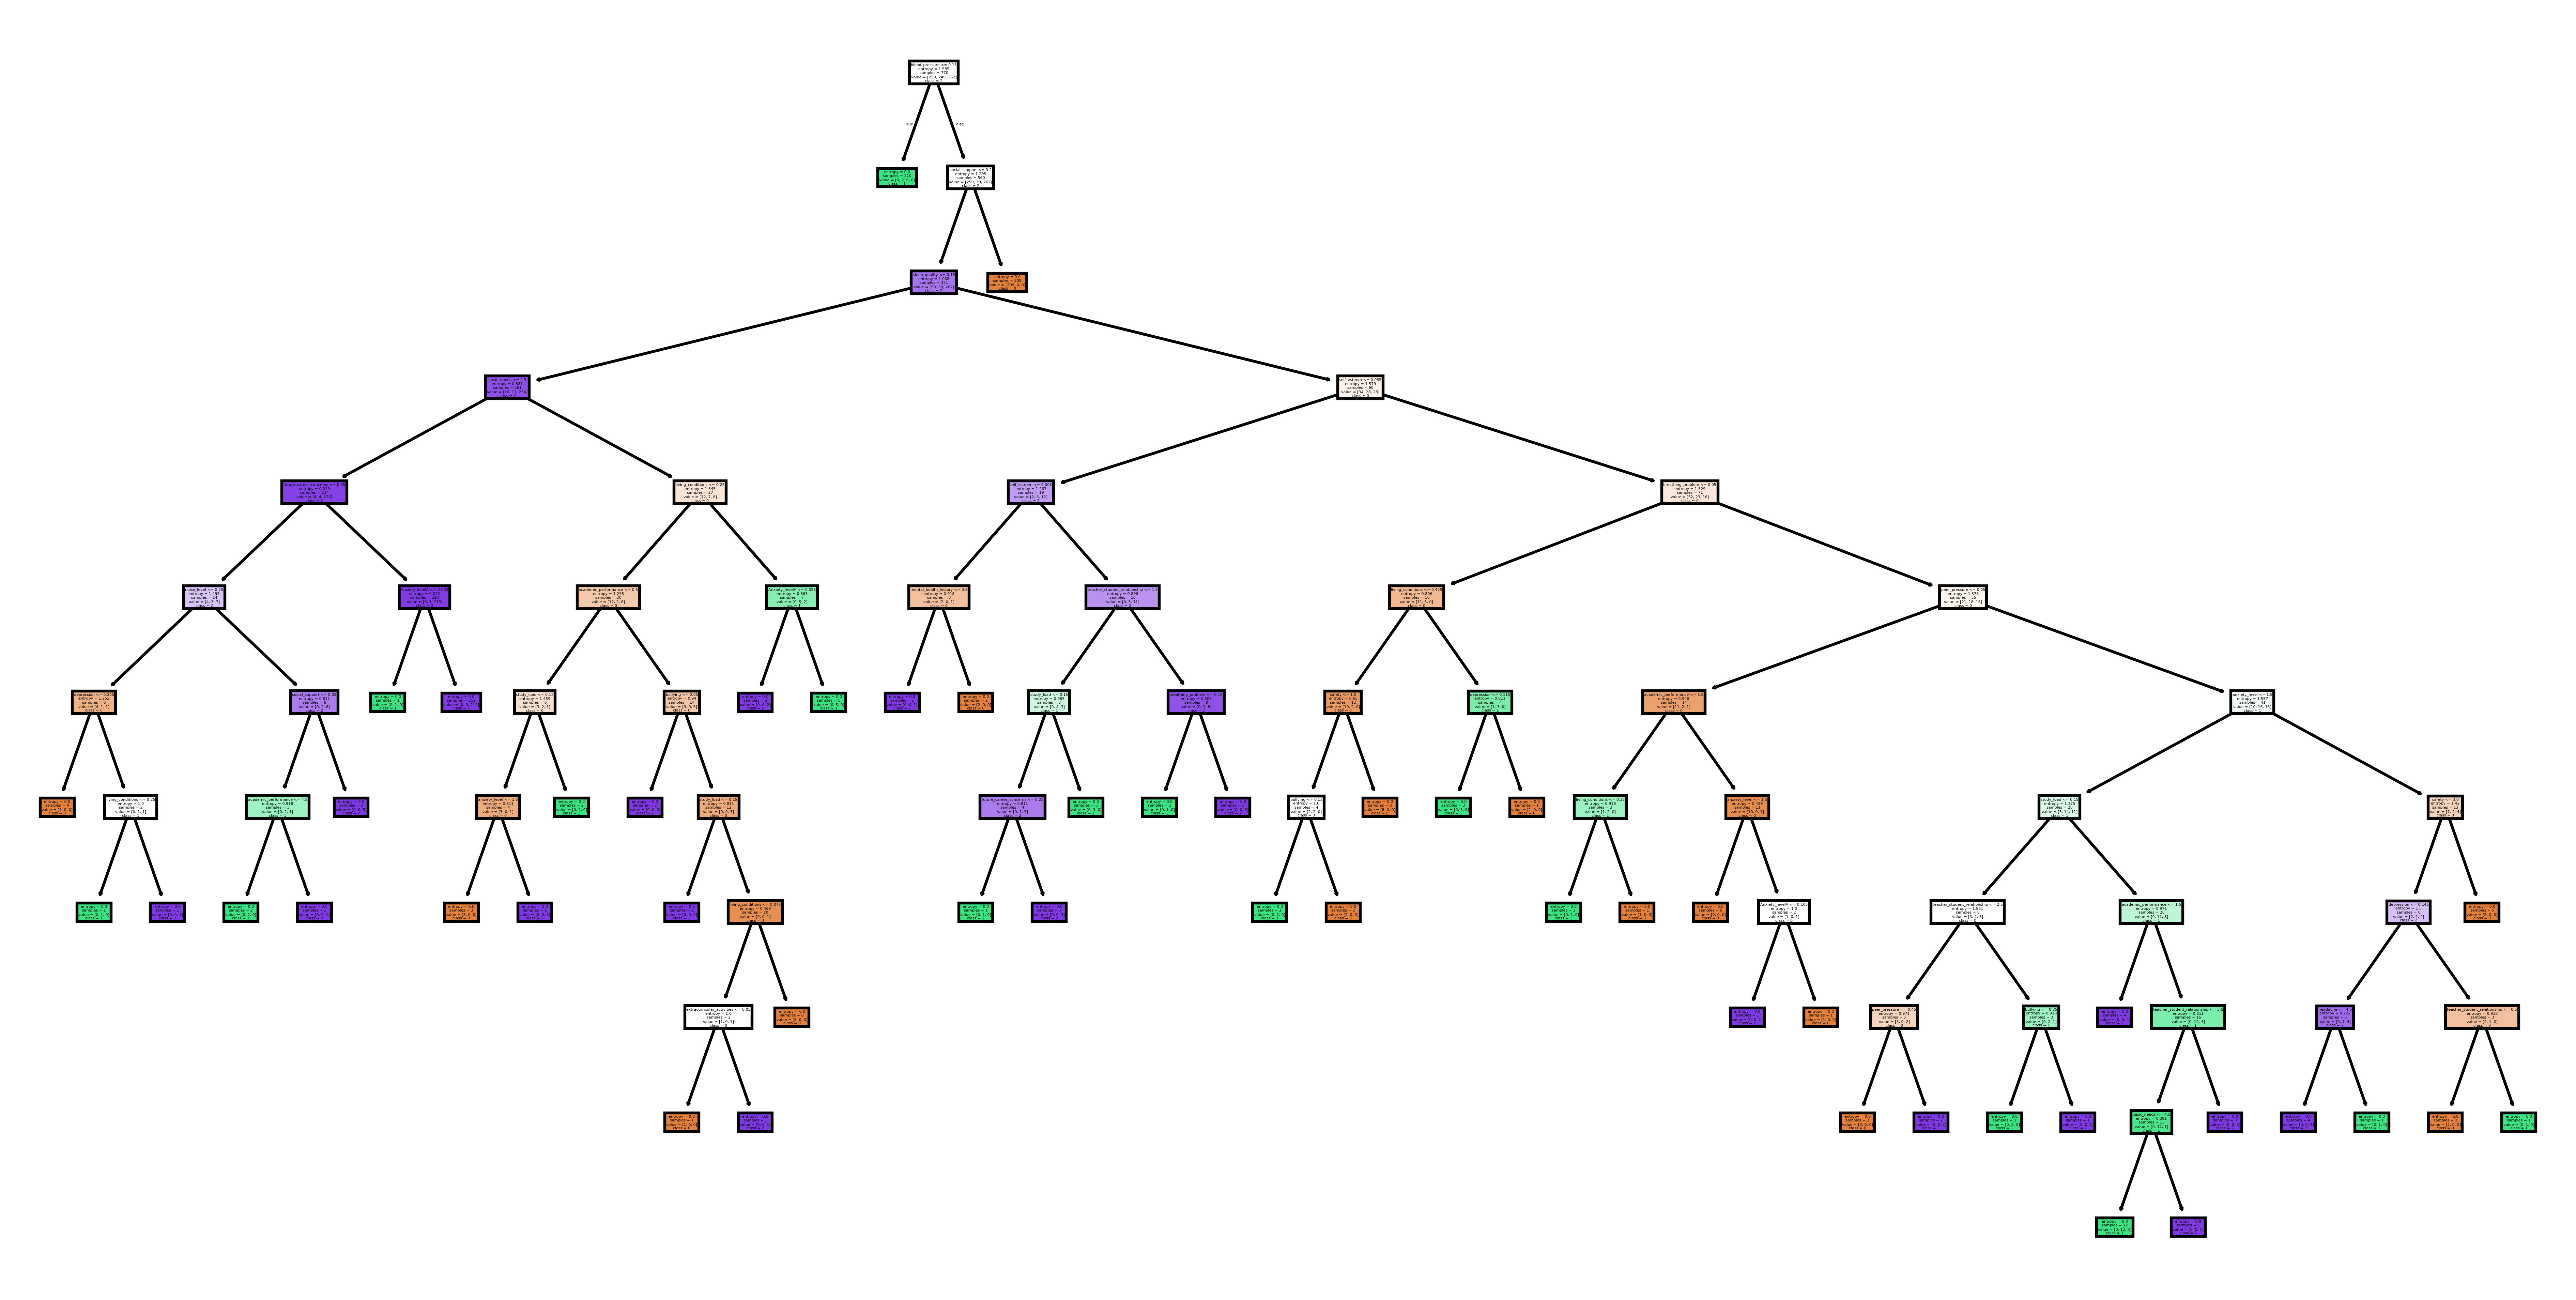

In [57]:
# Convert all feature columns to numeric types if applicable
for col in fn2:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le2 = LabelEncoder()
y2 = le2.fit_transform(data['stress_level'])
class_names2 = [str(class_label) for class_label in le2.classes_]

# Split dataset into features and target variable
X2 = data[fn2] # Features
y2 = le2.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

# Train Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion="entropy", random_state=1)
clf2.fit(X_train2, y_train2)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf2,
    feature_names=fn2,       # Ensure feature names are strings
    class_names=class_names2,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


3. ### Large (80% train, 20% test)

In [58]:
# Encoding the 'anxiety_level' column
le = LabelEncoder()
data['anxiety_level'] = le.fit_transform(data['anxiety_level'])

# Feature Selection
fn3 = data.keys().tolist()[:-1]  # Selecting columns from index 1 to the second-to-last column
X3 = data[fn3]
y3 = data['stress_level']

# Encode target variable to numerical values
le3 = LabelEncoder()
y_encoded3 = le3.fit_transform(y3)

# Splitting Data into 80% training and 20% testing subsets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_encoded3, test_size=0.2, random_state=1)

# Building decision tree model
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train Decision Tree Classifier
clf3 = clf3.fit(X_train3, y_train3)

# Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test3, y_pred3)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test3, y_pred3, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = recall_score(y_test3, y_pred3, average='weighted')  
print("Sensitivity:", sensitivity)

# Compute the confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)

# Calculate Specificity (Macro-Average for Multiclass)
specificity_per_class = []
for i in range(cm3.shape[0]):  # Loop through each class
    tn = cm3.sum() - (cm3[i, :].sum() + cm3[:, i].sum() - cm3[i, i])  # True Negatives
    fp = cm3[:, i].sum() - cm3[i, i]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)

# Compute Macro-Averaged Specificity
macro_specificity = sum(specificity_per_class) / len(specificity_per_class)
print("Macro-Averaged Specificity:", macro_specificity)


Accuracy: 0.8545454545454545
Error Rate: 0.1454545454545455
Precision: 0.8562382409968574
Sensitivity: 0.8545454545454545
Macro-Averaged Specificity: 0.9272283918719136


- #### Confusion matrix

[[64  4  6]
 [ 5 64  2]
 [10  5 60]]


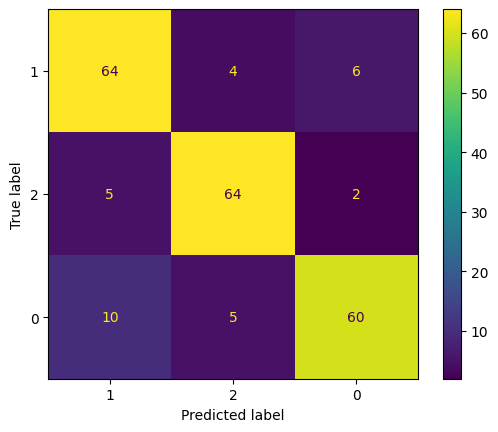

In [59]:
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['stress_level'].unique() # classes_names

class_labels3 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3, X_test3, y_test3, display_labels=cn3)

- #### Decision Tree:

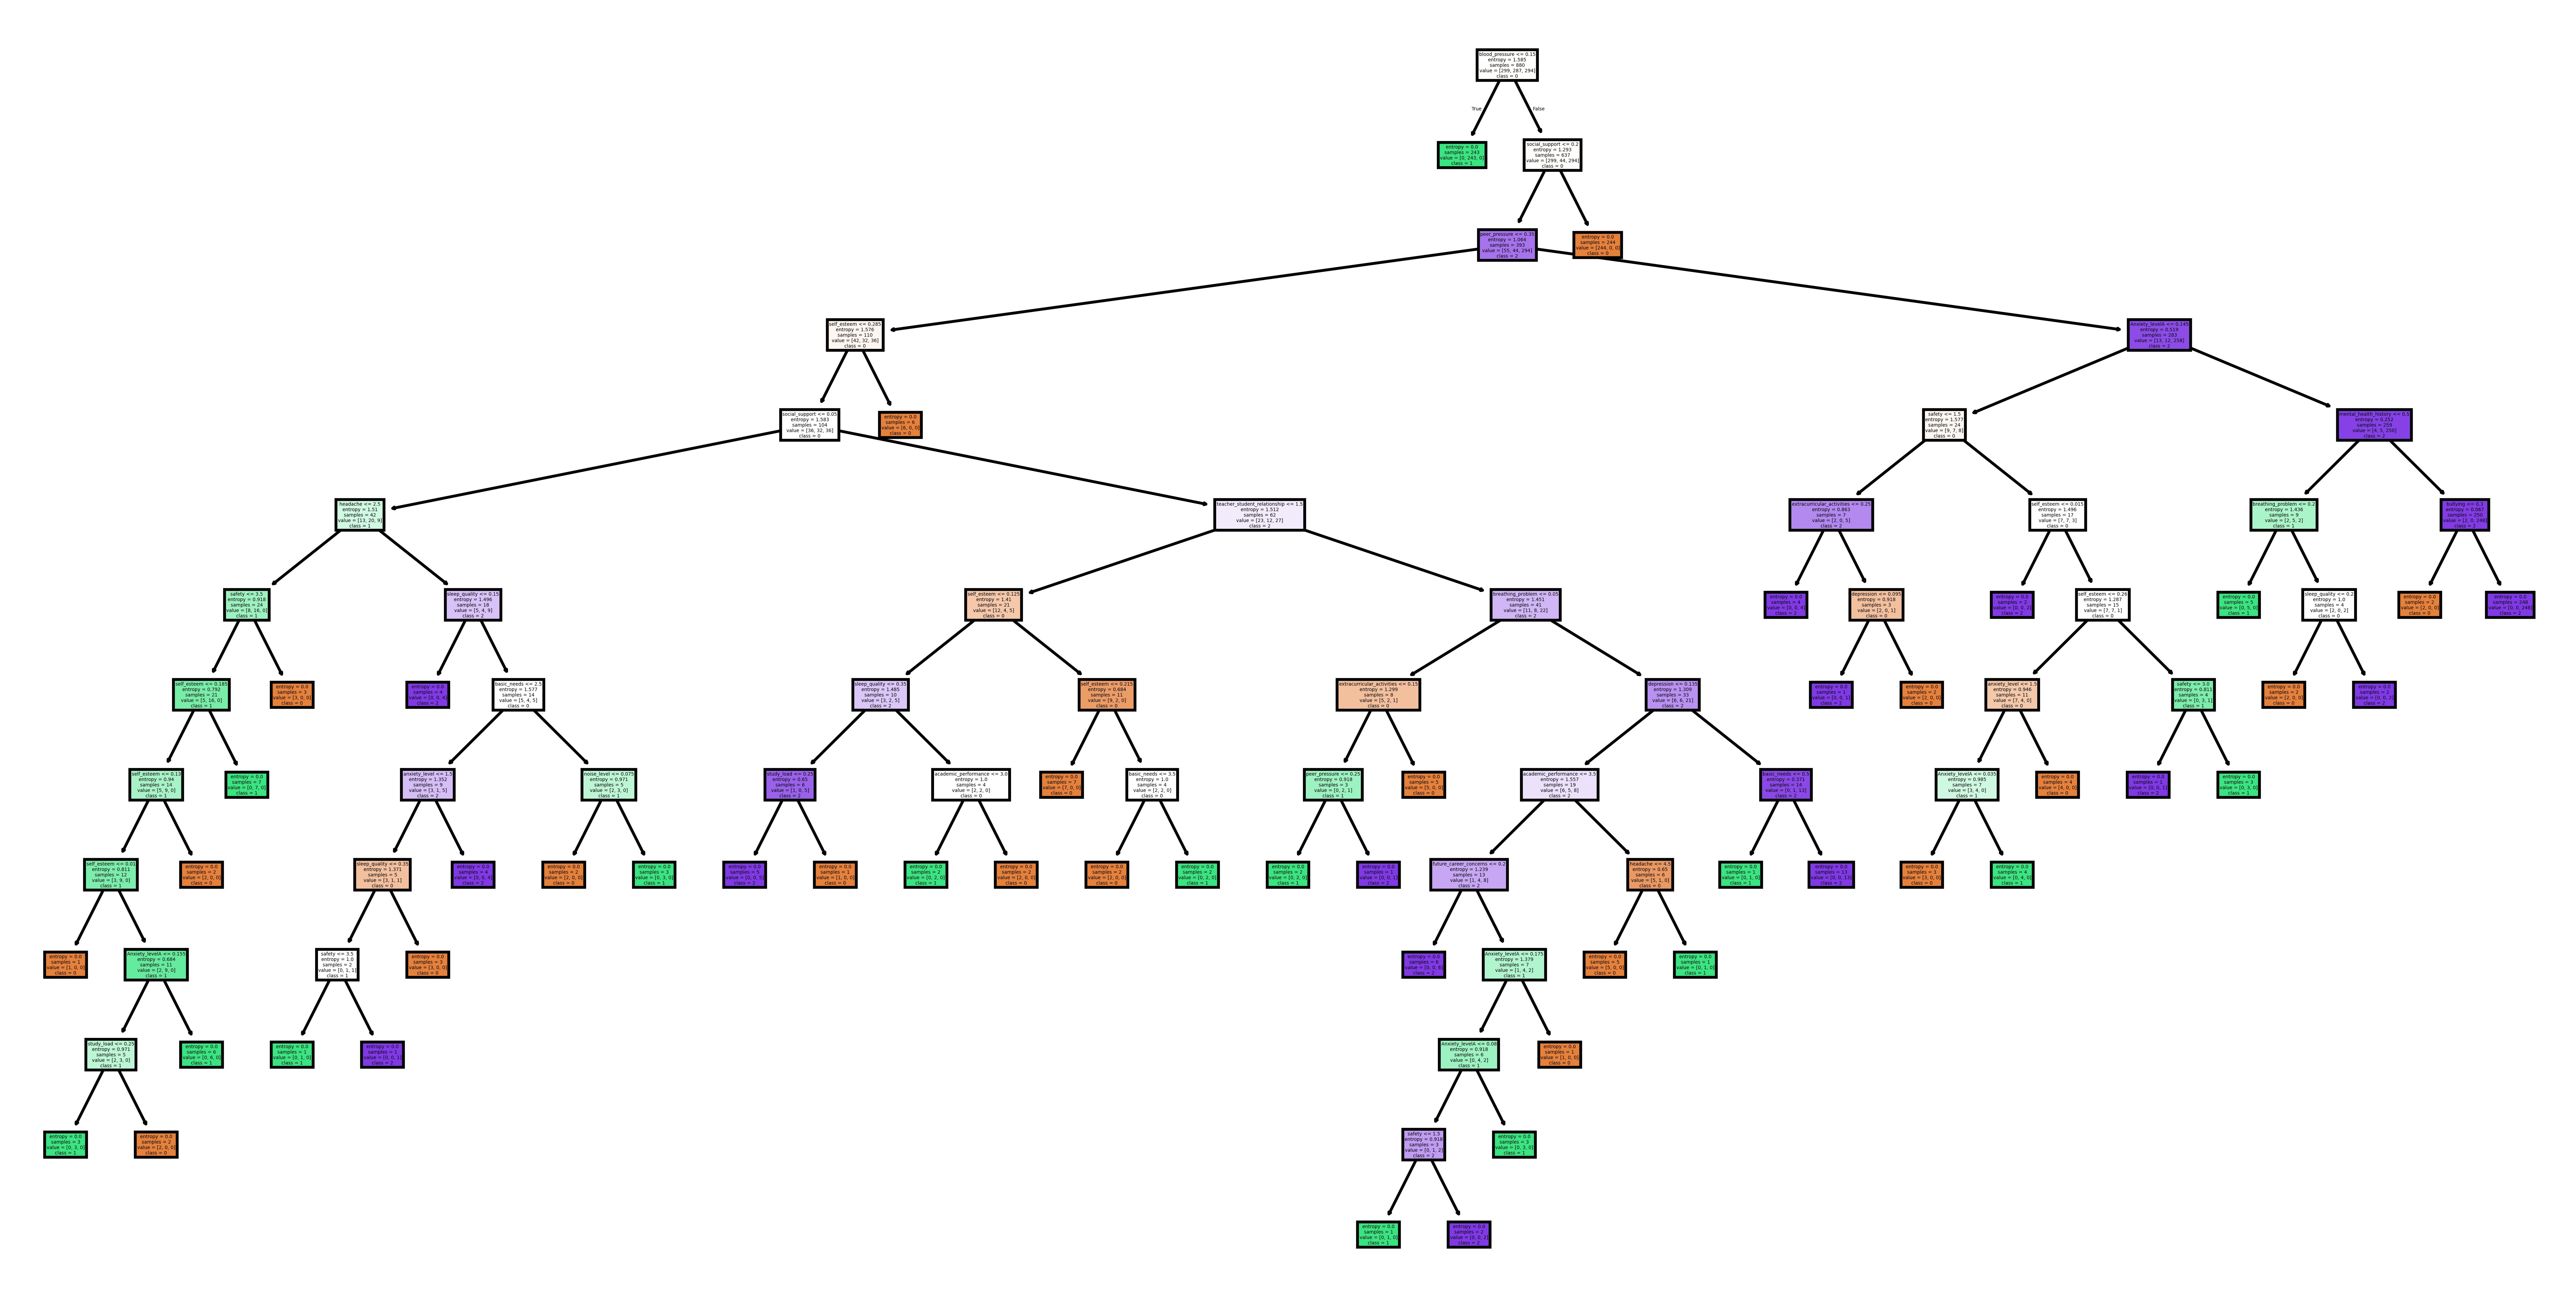

In [60]:
# Convert all feature columns to numeric types if applicable
for col in fn3:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le3 = LabelEncoder()
y3 = le3.fit_transform(data['stress_level'])
class_names3 = [str(class_label) for class_label in le3.classes_]

# Split dataset into features and target variable
X3 = data[fn3] # Features
y3 = le3.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Train Decision Tree Classifier
clf3 = DecisionTreeClassifier(criterion="entropy")
clf3.fit(X_train3, y_train3)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf3,
    feature_names=fn3,       # Ensure feature names are strings
    class_names=class_names3,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


Information Gain (entropy) results



The model was evaluated using three different training/testing set splits: Small (60% train, 40% test), Medium (70% train, 30% test), and Large (80% train, 20% test).



Accuracy and Error Rate were calculated for each split.

Small (60% train, 40% test)

Accuracy: 88.41%; Error Rate: 11.59%



Medium (70% train, 30% test):

Accuracy: 88.41%; Error Rate: 11.59%



Large (80% train, 20% test):

Accuracy: 88.41%; Error Rate: 11.59%



Overall Performance:

The model's performance using the Information Gain (entropy) was remarkably consistent across all three dataset splits.  The accuracy remained at approximately 88.41%, and the error rate remained at approximately 11.59%.



This unusual consistency suggests that the dataset's characteristics or the model's complexity might be influencing the results, making the model relatively insensitive to the size of the training set within the range tested.



### Gini Index

1. ### Small (60% train, 40% test)

In [61]:
# Feature Selection
fn1 = data.keys().tolist()[:-1]  # Selecting columns from index 1 to the second-to-last column
X1 = data[fn1]
y1 = data['stress_level']

# Encode target variable to numerical values
le1 = LabelEncoder()
y_encoded1 = le1.fit_transform(y1)

# Splitting Data into 60% training and 40% testing subsets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_encoded1, test_size=0.4, random_state=1)

# Building decision tree model
clf1 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf1 = clf1.fit(X_train1, y_train1)

# Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

# Calculate error rate
error_rate = 1 - accuracy

# Print Accuracy and Error Rate
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test1, y_pred1, average='weighted')
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = recall_score(y_test1, y_pred1, average='weighted')
print("Sensitivity:", sensitivity)

# Compute the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)

# Calculate Specificity (Macro-Average for Multiclass)
specificity_per_class = []
for i in range(cm1.shape[0]):  # Loop through each class
    tn = cm1.sum() - (cm1[i, :].sum() + cm1[:, i].sum() - cm1[i, i])  # True Negatives
    fp = cm1[:, i].sum() - cm1[i, i]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)

# Compute Macro-Averaged Specificity
macro_specificity = sum(specificity_per_class) / len(specificity_per_class)
print("Macro-Averaged Specificity:", macro_specificity)

Accuracy: 0.8818181818181818
Error Rate: 0.11818181818181817
Precision: 0.8819234835116471
Sensitivity: 0.8818181818181818
Macro-Averaged Specificity: 0.9408085327548416


- #### Confusion matrix

[[140  10   5]
 [  8 124  10]
 [ 11   8 124]]


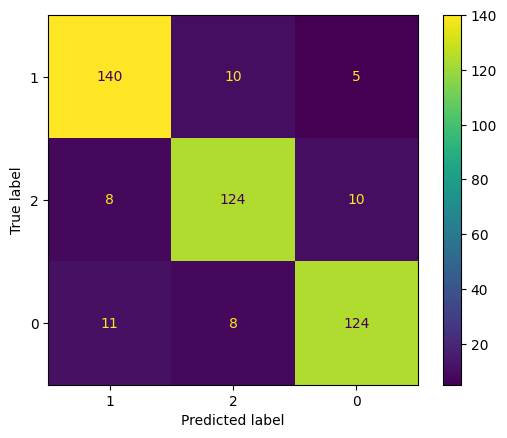

In [62]:
# Compute and print the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

from sklearn.metrics import ConfusionMatrixDisplay
cn1 = data['stress_level'].unique() # classes_names

class_labels1 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp1 = ConfusionMatrixDisplay.from_estimator(clf1, X_test1, y_test1, display_labels=cn1)

- #### Decision Tree:

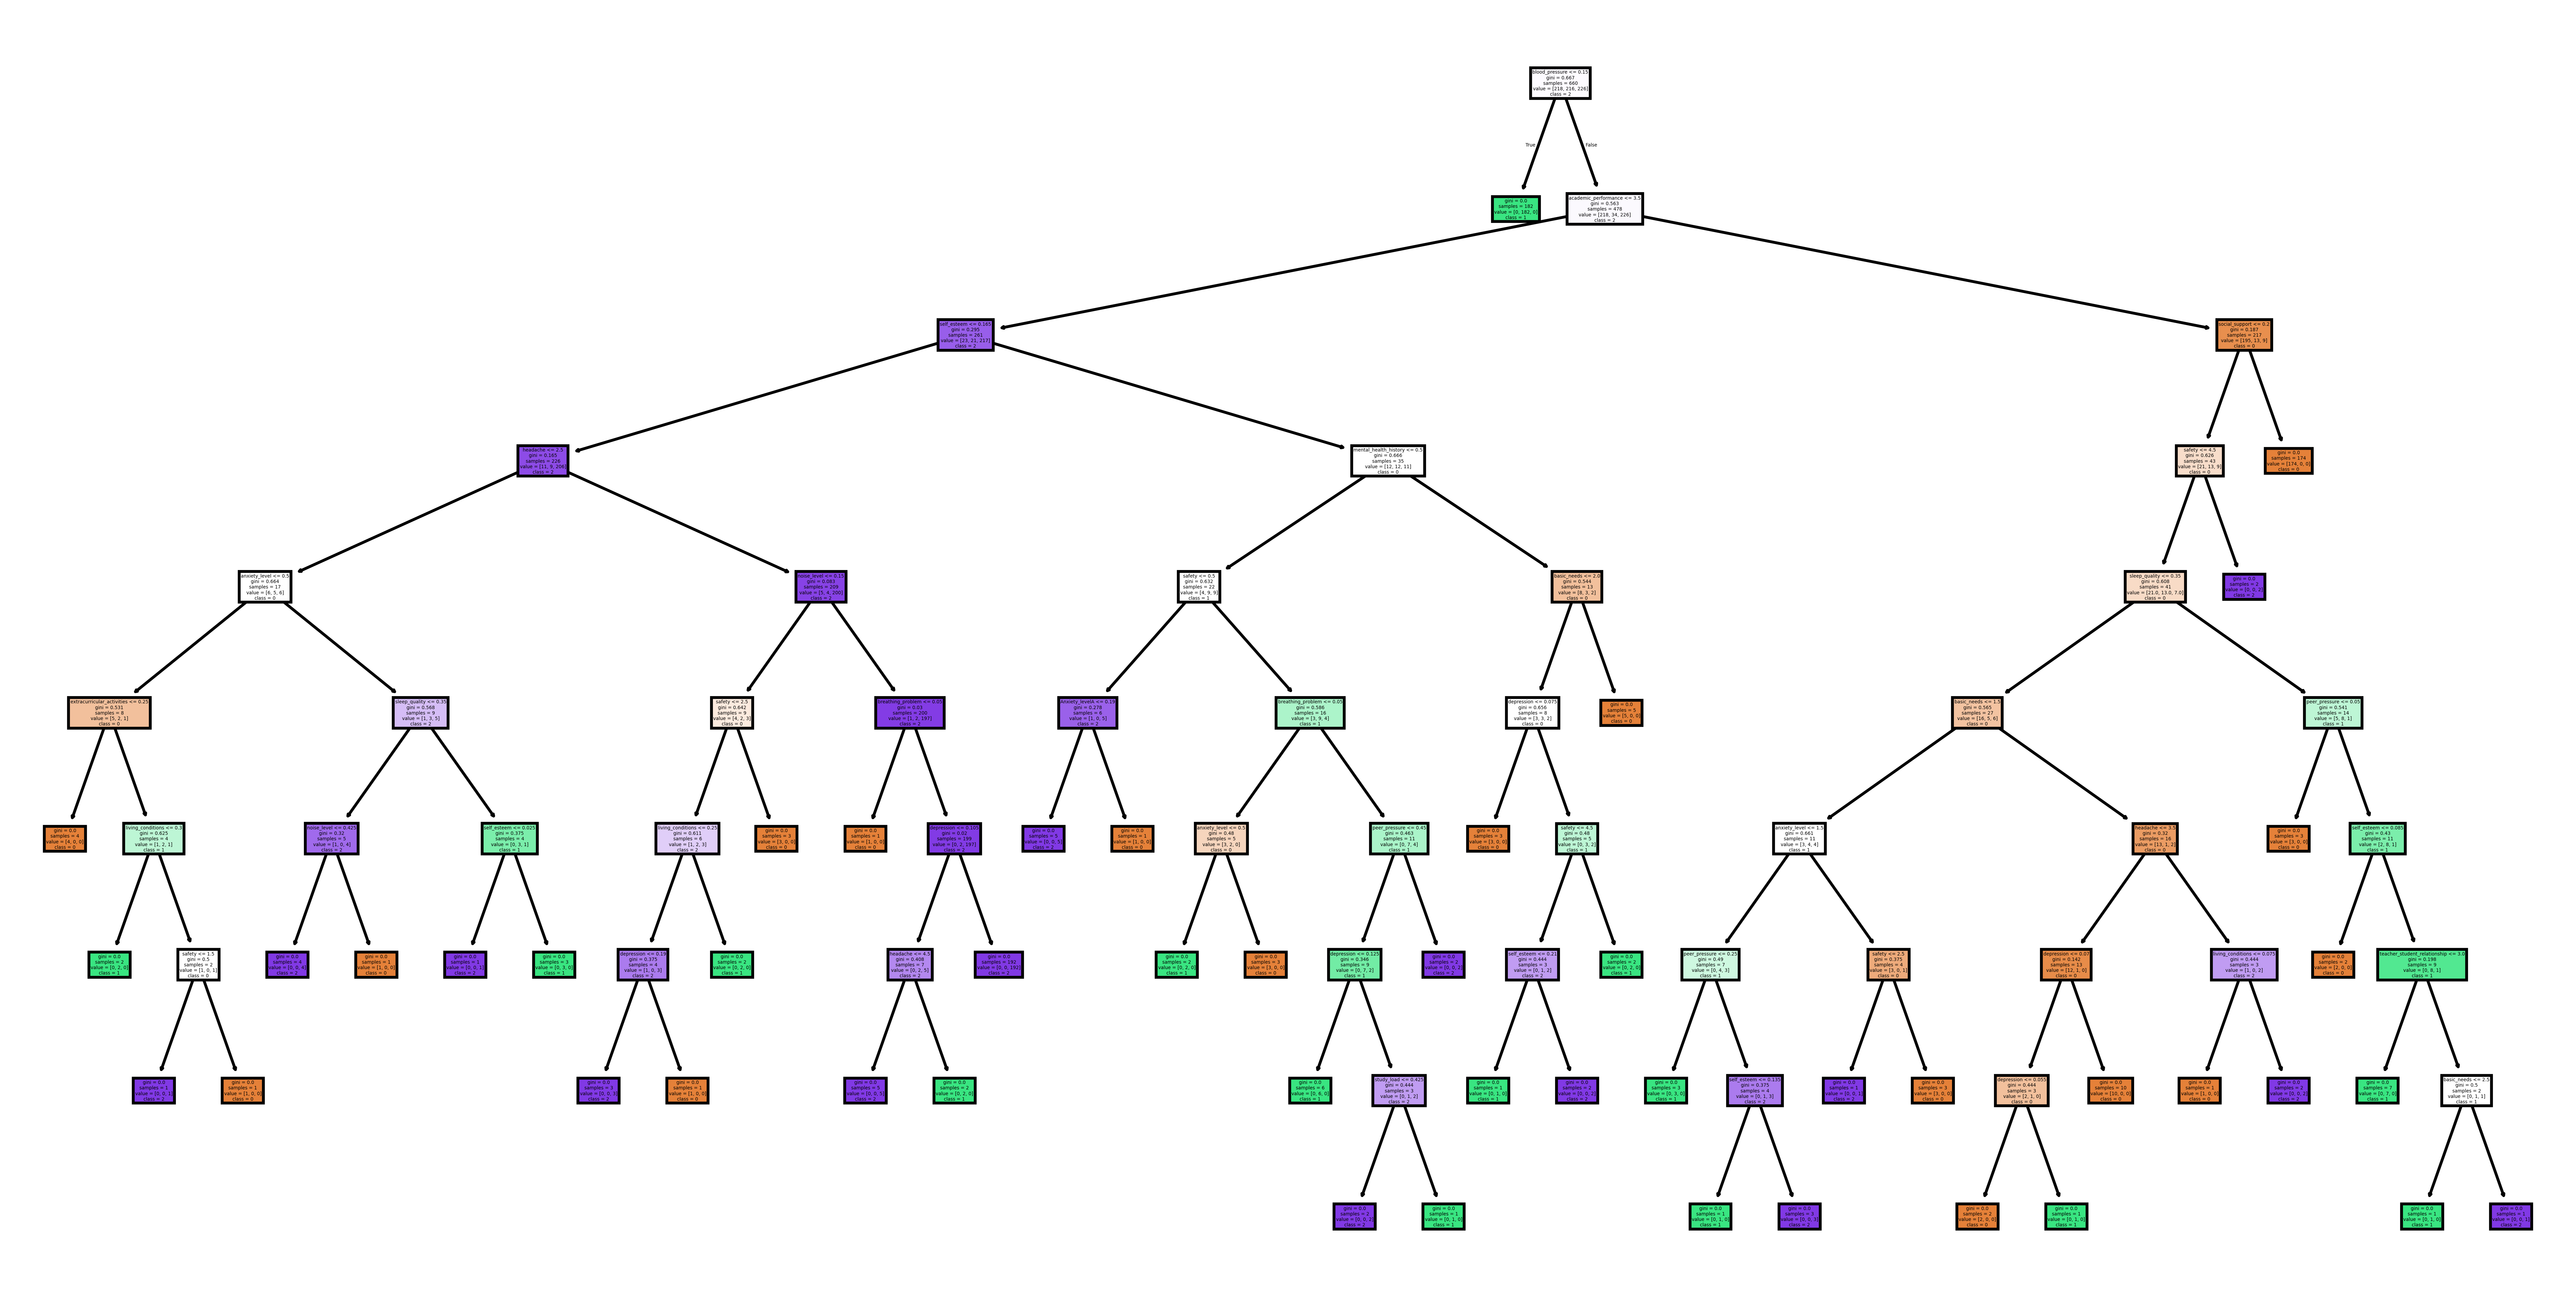

In [63]:
# Convert all feature columns to numeric types if applicable
for col in fn1:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le1 = LabelEncoder()
y1 = le1.fit_transform(data['stress_level'])
class_names1 = [str(class_label) for class_label in le1.classes_]

# Split dataset into features and target variable
X1 = data[fn1] # Features
y1 = le1.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# Train Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train1, y_train1)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf1,
    feature_names=fn1,       # Ensure feature names are strings
    class_names=class_names1,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()



2. ### Medium (70% train, 30% test)

In [64]:
# Feature Selection
fn2 = data.keys().tolist()[:-1]
X2 = data[fn2]
y2 = data['stress_level']

# Encode target variable to numerical values
le2 = LabelEncoder()
y_encoded2 = le2.fit_transform(y2)

# Splitting Data into 70% training and 30% testing subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_encoded2, test_size=0.3, random_state=1)

# Building decision tree model
clf2 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf2 = clf2.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test2, y_pred2)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = metrics.precision_score(y_test2, y_pred2, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = metrics.recall_score(y_test2, y_pred2, average='weighted')  
print("Sensitivity:", sensitivity)

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test2, y_pred2)

# Calculate Specificity (Macro-Average for Multiclass)
specificity_per_class = []
for i in range(cm.shape[0]):  # Loop through each class
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])  # True Negatives
    fp = cm[:, i].sum() - cm[i, i]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)

# Compute Macro-Averaged Specificity
macro_specificity = sum(specificity_per_class) / len(specificity_per_class)
print("Macro-Averaged Specificity:", macro_specificity)

Accuracy: 0.8484848484848485
Error Rate: 0.1515151515151515
Precision: 0.8487589872076945
Sensitivity: 0.8484848484848485
Macro-Averaged Specificity: 0.9242779419843519


- #### Confusion matrix

[[95 10  9]
 [10 92  7]
 [ 5  9 93]]


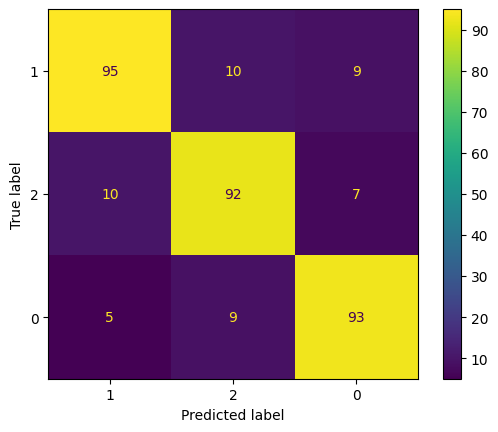

In [65]:
# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['stress_level'].unique() # classes_names

class_labels2 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp2 = ConfusionMatrixDisplay.from_estimator(clf2, X_test2, y_test2, display_labels=cn2)

- #### Decision Tree:

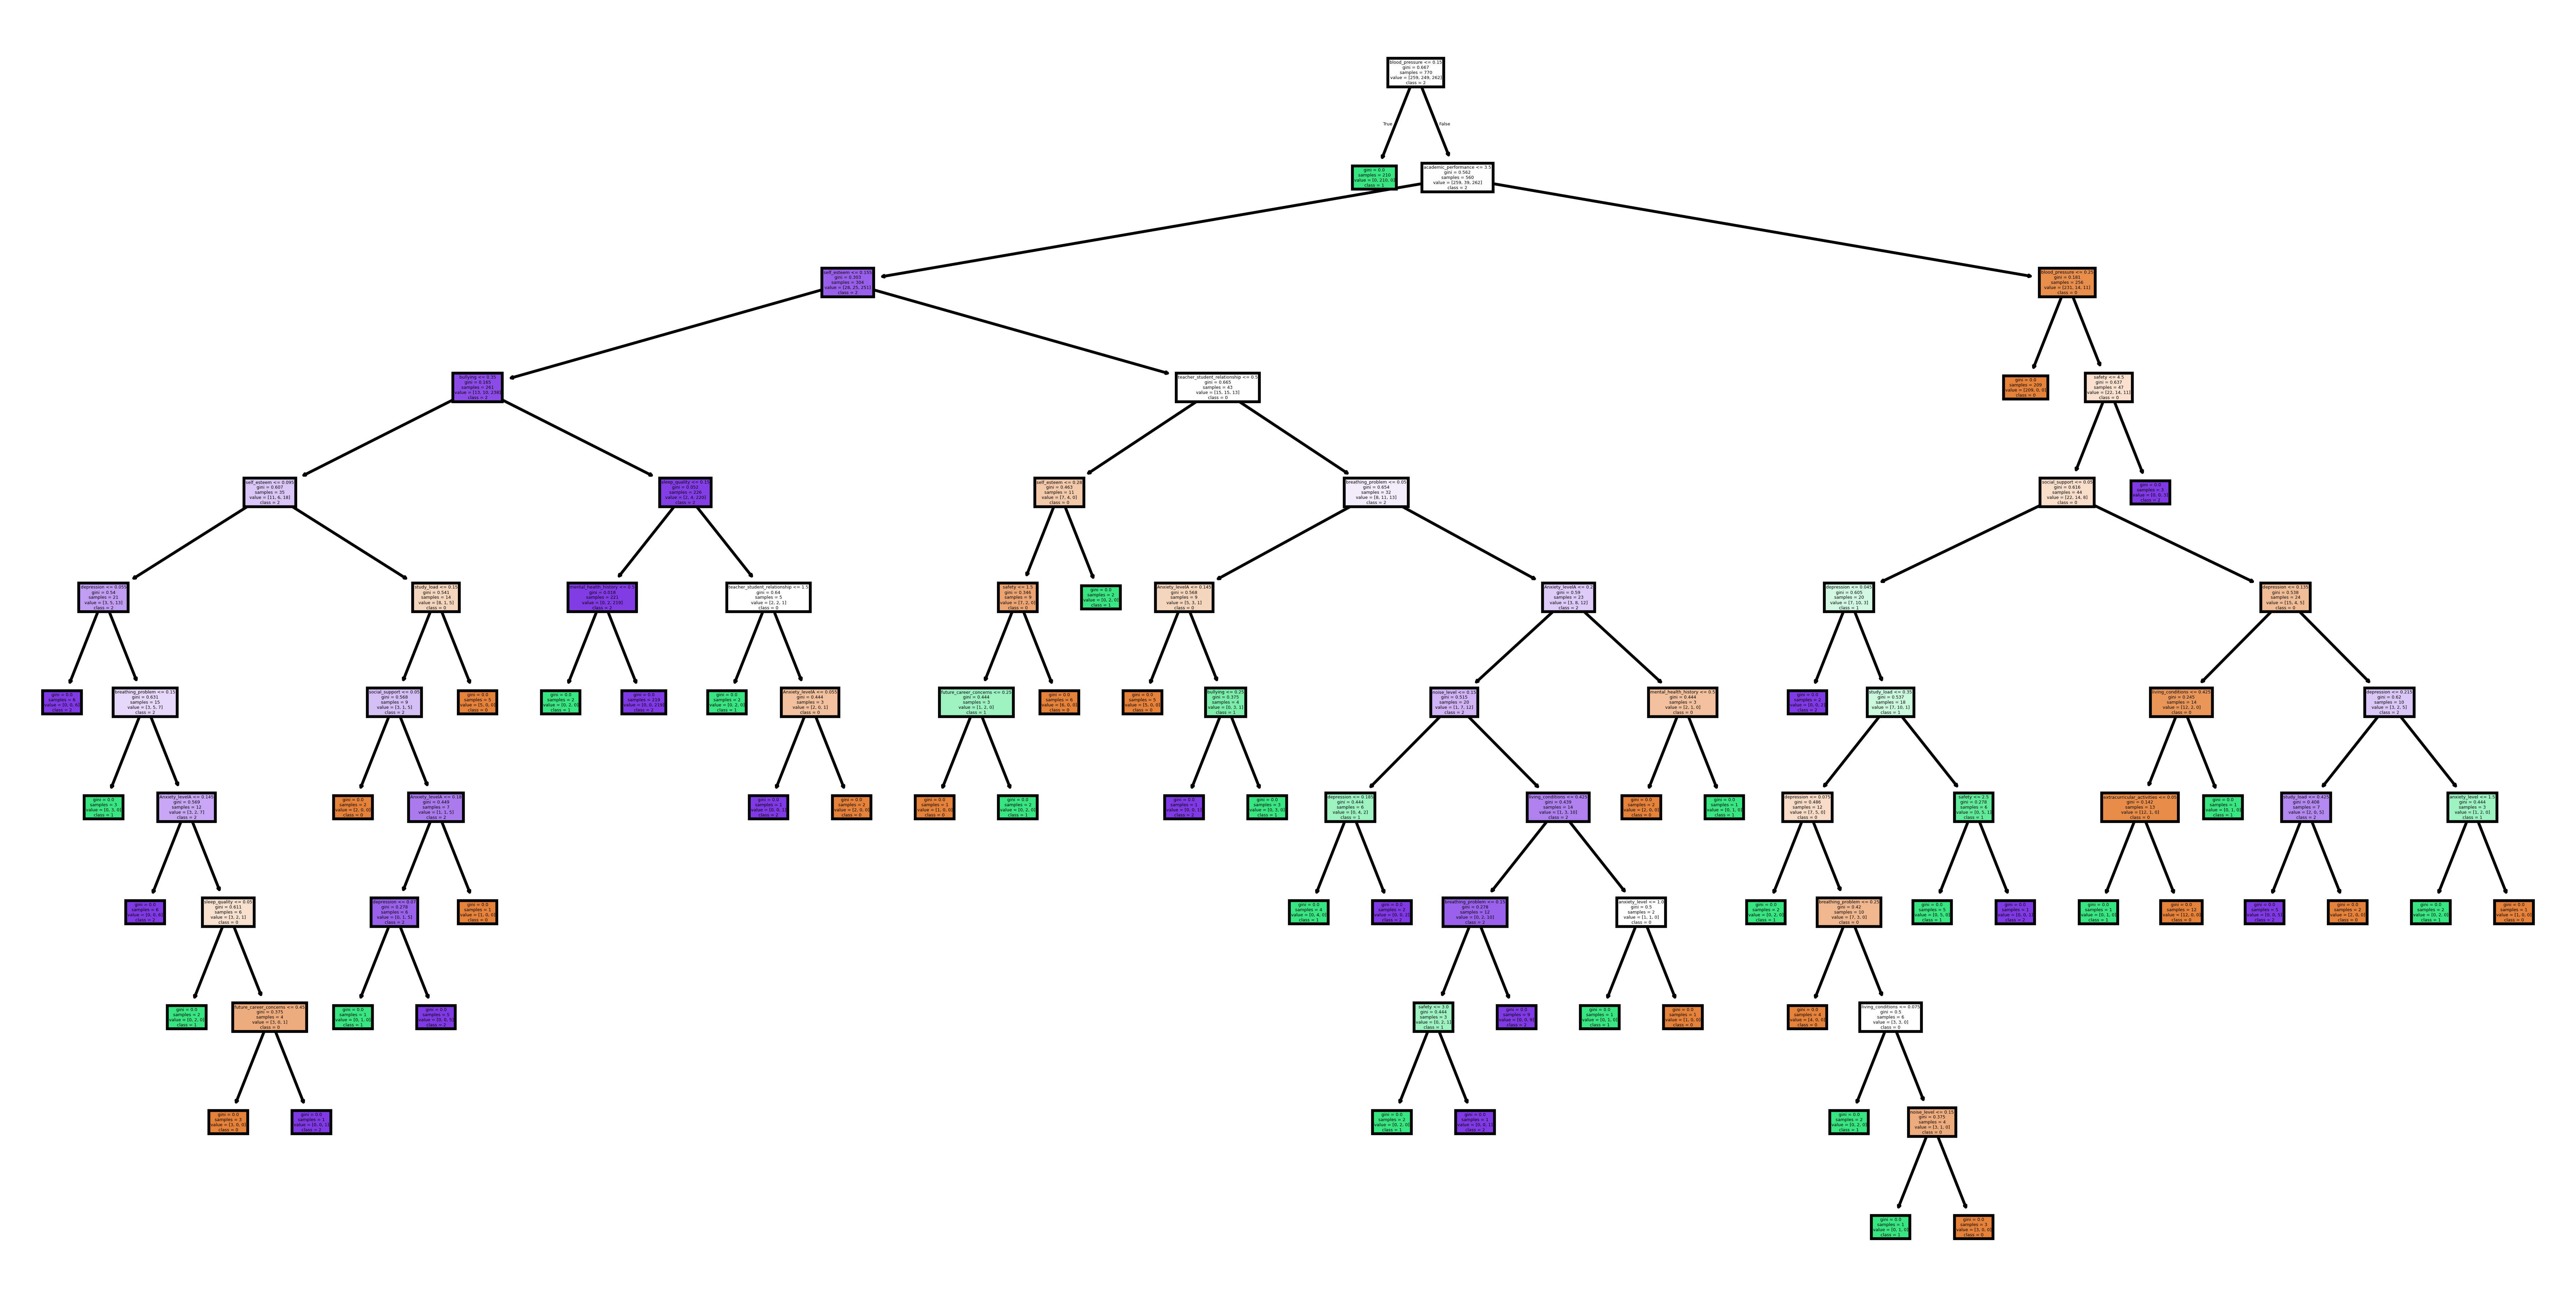

In [66]:
# Convert all feature columns to numeric types if applicable
for col in fn2:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le2 = LabelEncoder()
y2 = le2.fit_transform(data['stress_level'])
class_names2 = [str(class_label) for class_label in le2.classes_]

# Split dataset into features and target variable
X2 = data[fn2] # Features
y2 = le2.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

# Train Decision Tree Classifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train2, y_train2)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf2,
    feature_names=fn2,       # Ensure feature names are strings
    class_names=class_names2,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


3. ### Large (80% train, 20% test)

In [67]:
# Feature Selection
fn3 = data.keys().tolist()[:-1]
X3 = data[fn3]
y3 = data['stress_level']

# Encode target variable to numerical values
le3 = LabelEncoder()
y_encoded3 = le3.fit_transform(y3)

# Splitting Data into 80% training and 20% testing subsets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_encoded3, test_size=0.2, random_state=1)

# Building decision tree model
clf3 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf3 = clf3.fit(X_train3, y_train3)

# Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test3, y_pred3)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = metrics.precision_score(y_test3, y_pred3, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = metrics.recall_score(y_test3, y_pred3, average='weighted')  
print("Sensitivity:", sensitivity)

# Compute the confusion matrix
cm3 = metrics.confusion_matrix(y_test3, y_pred3)

# Calculate Specificity (Macro-Average for Multiclass)
specificity_per_class = []
for i in range(cm3.shape[0]):  # Loop through each class
    tn = cm3.sum() - (cm3[i, :].sum() + cm3[:, i].sum() - cm3[i, i])  # True Negatives
    fp = cm3[:, i].sum() - cm3[i, i]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)

# Compute Macro-Averaged Specificity
macro_specificity = sum(specificity_per_class) / len(specificity_per_class)
print("Macro-Averaged Specificity:", macro_specificity)


Accuracy: 0.8545454545454545
Error Rate: 0.1454545454545455
Precision: 0.8565880322209436
Sensitivity: 0.8545454545454545
Macro-Averaged Specificity: 0.927290105981302


- #### Confusion matrix

[[64  5  5]
 [ 8 61  2]
 [ 7  5 63]]


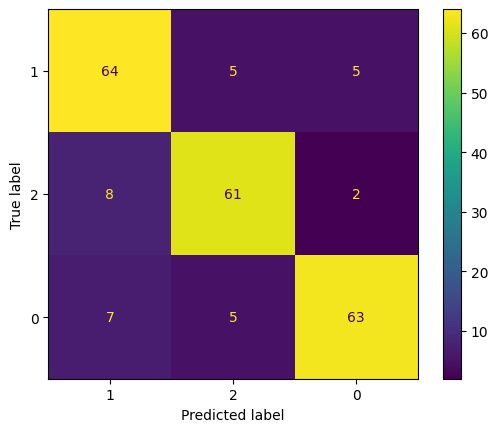

In [68]:
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['stress_level'].unique() # classes_names

class_labels3 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3, X_test3, y_test3, display_labels=cn3)

- #### Decision Tree:

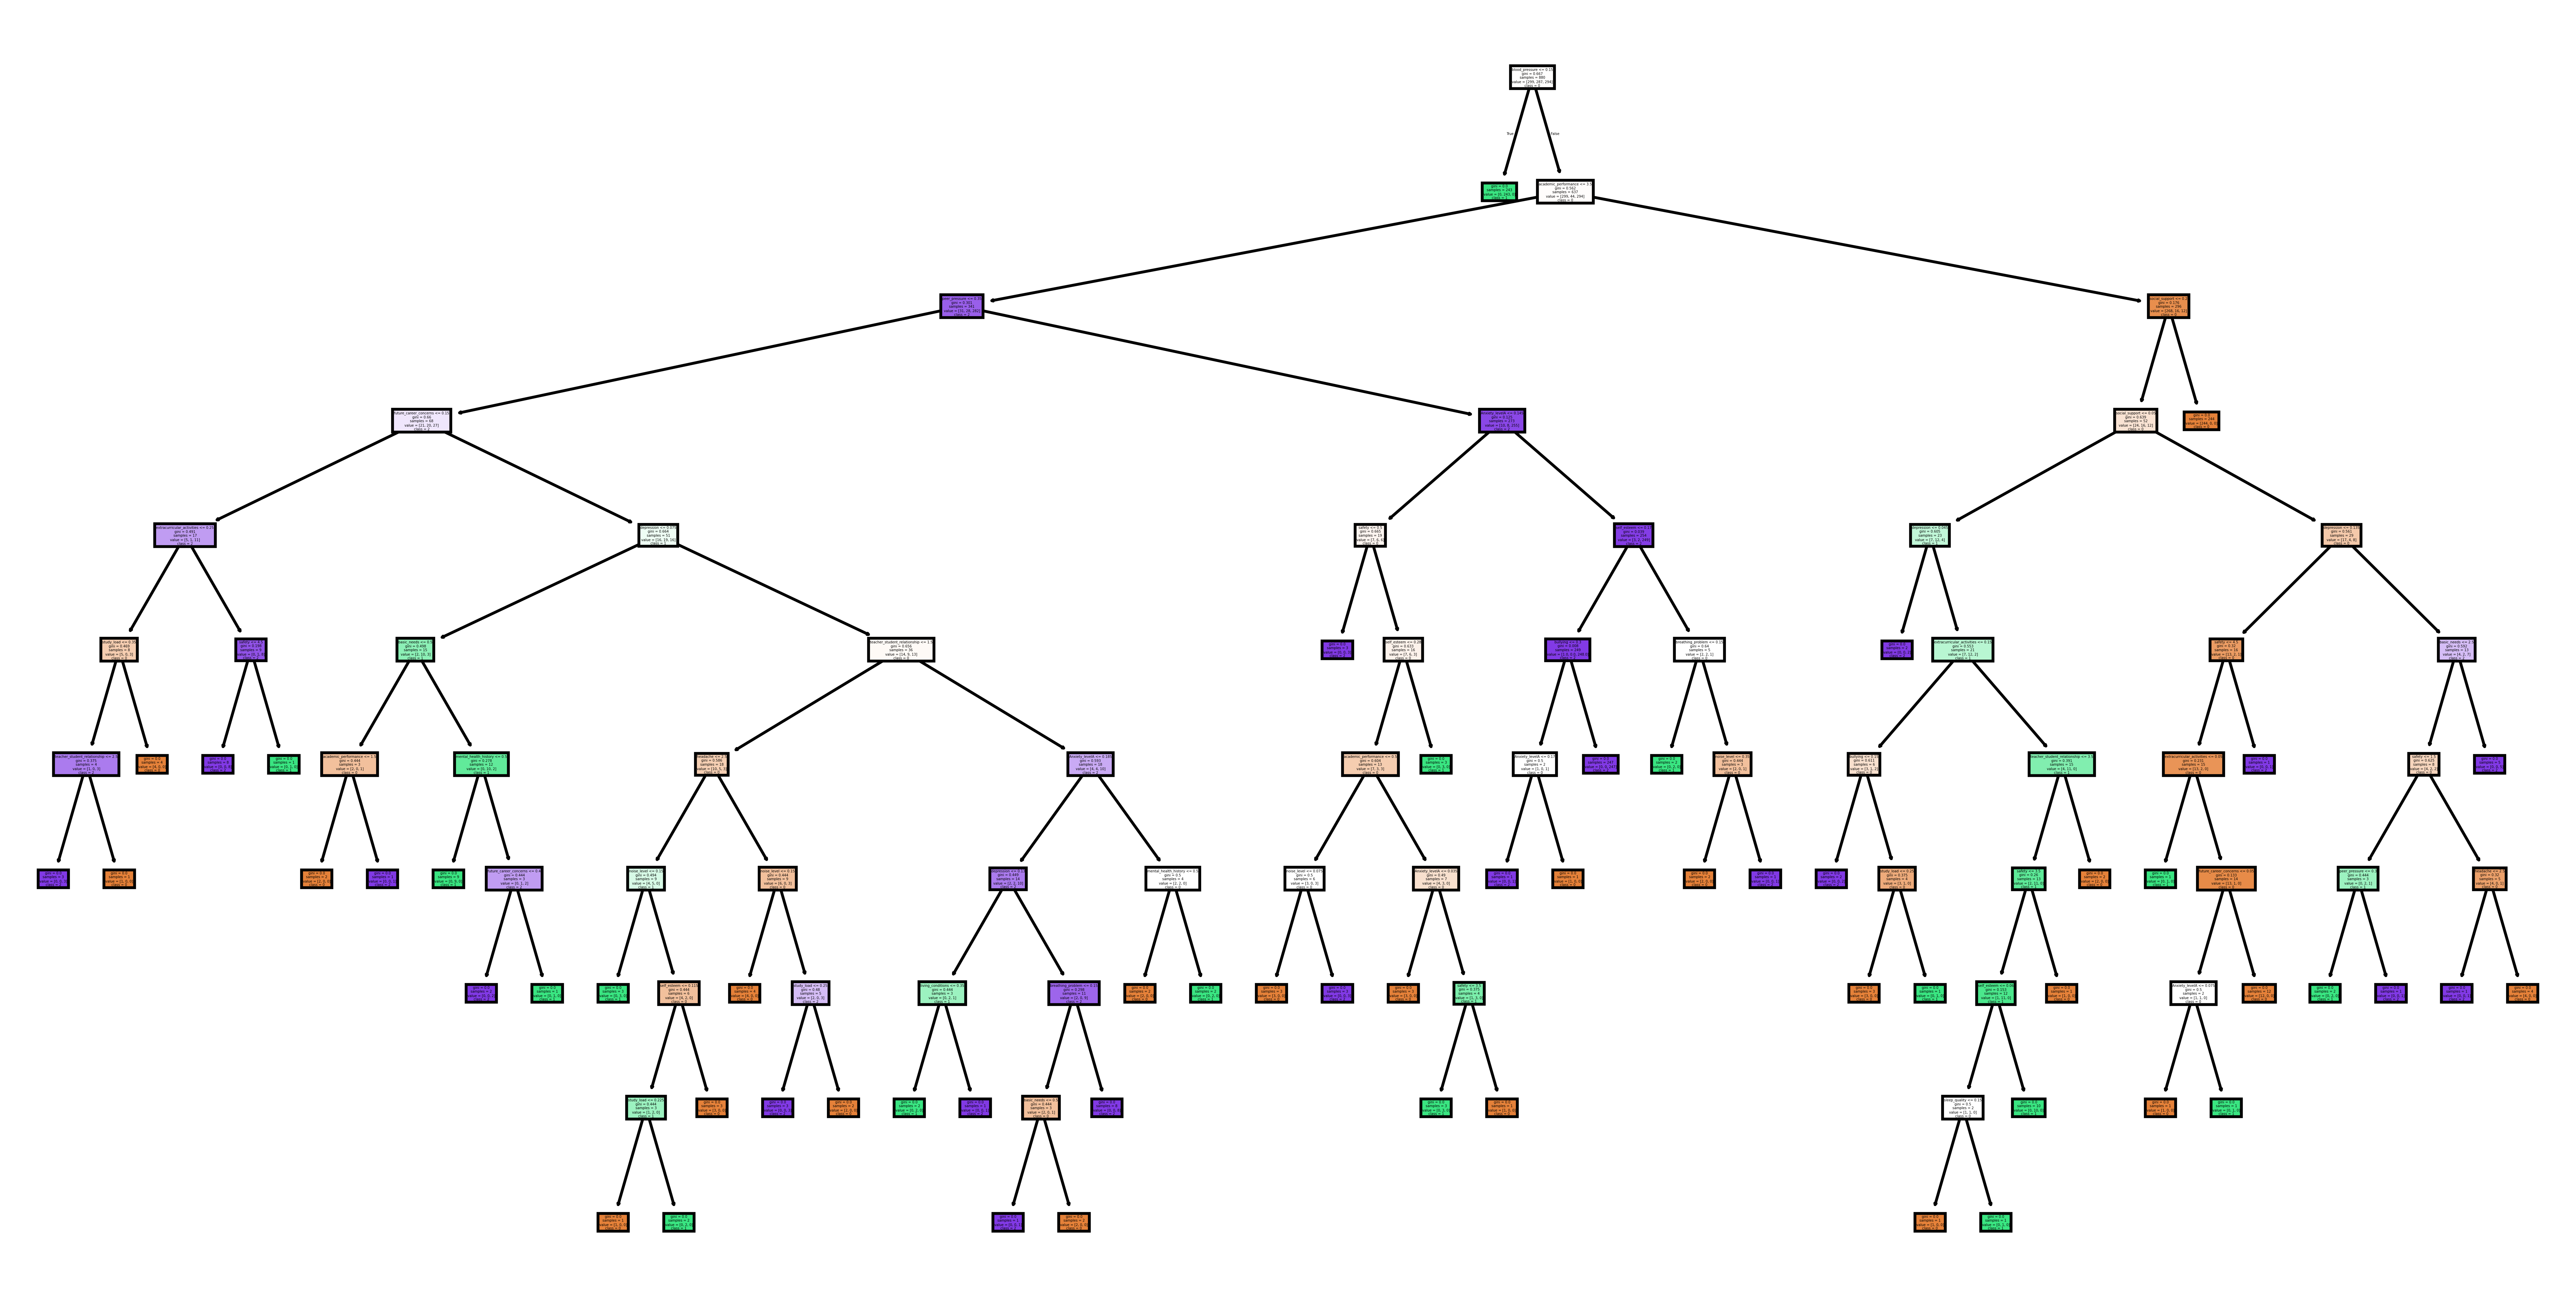

In [69]:
# Convert all feature columns to numeric types if applicable
for col in fn3:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le3 = LabelEncoder()
y3 = le3.fit_transform(data['stress_level'])
class_names3 = [str(class_label) for class_label in le3.classes_]

# Split dataset into features and target variable
X3 = data[fn3] # Features
y3 = le3.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Train Decision Tree Classifier
clf3 = DecisionTreeClassifier()
clf3.fit(X_train3, y_train3)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf3,
    feature_names=fn3,       # Ensure feature names are strings
    class_names=class_names3,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


Gini Index results



The model was evaluated using three different training/testing set splits: Small (60% train, 40% test), Medium (70% train, 30% test), and Large (80% train, 20% test).



Accuracy and Error Rate were calculated for each split.

Small (60% train, 40% test)

Accuracy: 87.05%; Error Rate: 12.95%



Medium (70% train, 30% test):

Accuracy: 87.05%; Error Rate: 12.95%



Large (80% train, 20% test):

Accuracy: 87.05%; Error Rate: 12.95%



Overall Performance:

The model's performance using the Gini index was remarkably consistent across all three dataset splits.  The accuracy remained at approximately 87.05%, and the error rate remained at approximately 12.95%.



This unusual consistency suggests that the dataset's characteristics or the model's complexity might be influencing the results, making the model relatively insensitive to the size of the training set within the range tested.



Comparison: Information Gain vs Gini Index



To compare the models based on Gini Index and Information Gain we need to look at the evaluation metrics provided for each and see which set of metrics represents the best model performance.



Information Gain (IG) Results:

  Accuracy: is 88.41%
  Error Rate: is 11.59%
(consistent across all three dataset splits)



Gini Index Results:

  Accuracy: is 87.05%
  Error Rate: is 12.95%
(consistent across all three dataset splits)





-Information Gain consistently achieved a slightly higher accuracy (approximately 88.41%) than the Gini Index (approximately 87.05%).

-Information Gain consistently resulted in a lower error rate (approximately 11.59%) compared to the Gini Index (approximately 12.95%).



Consistency:The most striking observation is the unusual consistency of results across different dataset splits for *both* criteria.  This suggests factors beyond the training/testing split ratio are significantly influencing the model's performance.



Conclusion:

While both splitting criteria produced surprisingly consistent results across different dataset sizes, Information Gain demonstrated slightly better performance in terms of both accuracy and error rate.  The unexpected consistency warrants further investigation into the dataset's characteristics and the model's behavior.  The results suggest that increasing the training set size beyond 80% might not significantly improve performance in this case.

# Clustering
The primary objective of clustering is to group similar data points based on specific features or attributes, without prior knowledge of labels or predefined classes. The goal is to uncover inherent patterns or structures within the data, enabling a deeper understanding of the relationships and organization present.

We experimented with three different numbers of clusters:

K = 3 , K = 4 , K = 5.

# Silhouette method
The Silhouette method is used to assess the quality of clustering by calculating a silhouette score for each data point. This score evaluates how closely a data point matches its own cluster compared to other clusters. The score ranges from -1 to 1, with higher values indicating well-clustered points and lower values suggesting potential misclassification. This technique is valuable for determining the optimal number of clusters and evaluating the overall effectiveness of the clustering process.


In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv('Dataset/Processed_dataset.csv')

# Define the categorical features to be encoded
categorical_features = ['stress_level', 'anxiety_level']

# Create a ColumnTransformer that will apply OneHotEncoder to categorical features
# and StandardScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features), # Apply OneHotEncoder to categorical columns
        ('num', StandardScaler(), df.drop(categorical_features, axis=1).columns) # Apply StandardScaler to the rest
    ]
)


# Apply the transformations (fit and transform the data)
df_transformed = preprocessor.fit_transform(df)


# Convert the transformed data into a DataFrame for better readability
df_scaled = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())


# Display the first few rows of the scaled and encoded DataFrame
print("\nScaled and Encoded DataFrame:")
print(df_scaled.head())





Scaled and Encoded DataFrame:
   cat__stress_level_0  cat__stress_level_1  cat__stress_level_2  \
0                  0.0                  1.0                  0.0   
1                  0.0                  0.0                  1.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  0.0   

   cat__anxiety_level_High  cat__anxiety_level_Low  cat__anxiety_level_Medium  \
0                      1.0                     0.0                        0.0   
1                      1.0                     0.0                        0.0   
2                      0.0                     0.0                        1.0   
3                      1.0                     0.0                        0.0   
4                      1.0                     0.0                        0.0   

   num__Anxiety_levelA  num__self_esteem  num__mental_health_history  \
0

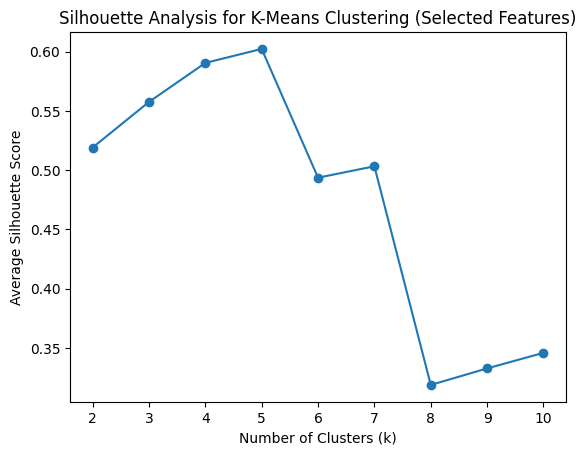

The highest average Silhouette score is 0.6023432193130702 with k=5.
The second highest average Silhouette score is 0.5905248976198446 with k=4.


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
df = pd.read_csv('Dataset/Processed_dataset.csv')

# Define the selected features
features = ['self_esteem', 'blood_pressure', 'sleep_quality', 'future_career_concerns', 'bullying']

# Scale the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])  # Scaling only the selected features

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []  # List to store silhouette scores for each k

# Perform K-means clustering and calculate the average Silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # Fit the K-means model with the current k
    kmeans_result = kmeans.fit_predict(df_scaled)  # Predict the clusters
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)  # Calculate the average silhouette score
    silhouette_avg_values.append(silhouette_avg)  # Append the score to the list

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]  # k corresponding to the highest score
best_score = max(silhouette_avg_values)  # Highest silhouette score

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering (Selected Features)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Print the highest and second-highest average silhouette scores and their corresponding k values
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")




As demonstrated above, the analysis revealed that the optimal number of clusters (k) maximizing the average Silhouette coefficient is 5

# Elbow method
The Elbow method is a commonly used technique in clustering analysis, particularly with k-means clustering, to identify the optimal number of clusters for a dataset. This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (k). The optimal number of clusters is typically indicated by the 'elbow' point on the curve, where the rate of decrease in WCSS slows significantly, suggesting a balance between cluster compactness and complexity.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


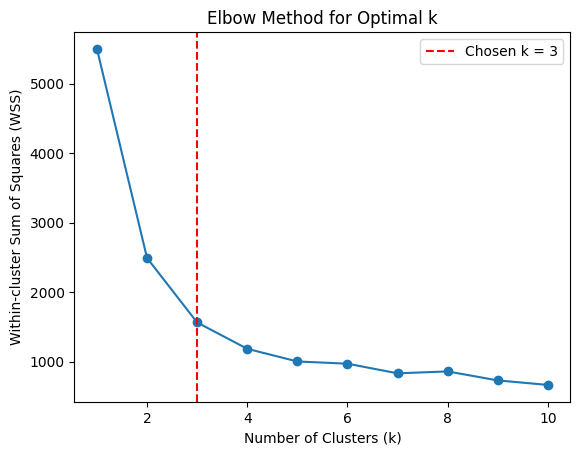

The optimal number of clusters (k) determined by the elbow method is 3.


In [75]:
# Install the kneed library for determining the optimal number of clusters using the elbow method
!pip install kneed

# Import necessary libraries for plotting and clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator


# Assuming df_scaled is the scaled data
X = df_scaled

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

# Fit K-means for each k value and calculate the WSS (Within-cluster Sum of Squares)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # Initialize KMeans for each k
    kmeans.fit(X) # Fit the model to the data
    wss_values.append(kmeans.inertia_)  # Store the WSS for the current k

# Plot the elbow method: WSS vs number of clusters (k)
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to detect the 'elbow' or turning point in the curve
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow  # The point where the WSS starts to decrease at a slower rate

# Highlight the turning point (optimal k) in the plot
plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()  # Add a legend to the plot
plt.show()

# Print the optimal number of clusters (k) based on the elbow method
print(f"The optimal number of clusters (k) determined by the elbow method is {turning_point}.")


We discovered a second turning point that correlates to the second-highest average Silhouette coefficient after examining the elbow plot. We will select k=3 for the third k-means clustering since this turning point indicates a distinct cluster architecture. We hope to capture a wide variety of cluster forms and optimize the possible clustering performance by taking into account this extra turning point.

# k-Means Algorithm
Each cluster is characterized by its central point, known as the cluster centroid.

# K = 3

In [76]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the cluster centers (centroids) of the 3 clusters
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
# Print the labels for each data point, indicating which cluster each data point belongs to
print("\nCluster Labels:")
print(kmeans_result.labels_)


Cluster Centers:
[[ 0.87160896  0.03195539  1.07891605 -0.971755   -0.9775455 ]
 [-0.96549447  0.98198051 -0.8756586   0.96937318  0.90670043]
 [ 0.24972719 -1.41044155 -0.13665306 -0.12904182 -0.03430045]]

Cluster Labels:
[2 1 2 ... 0 1 1]



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

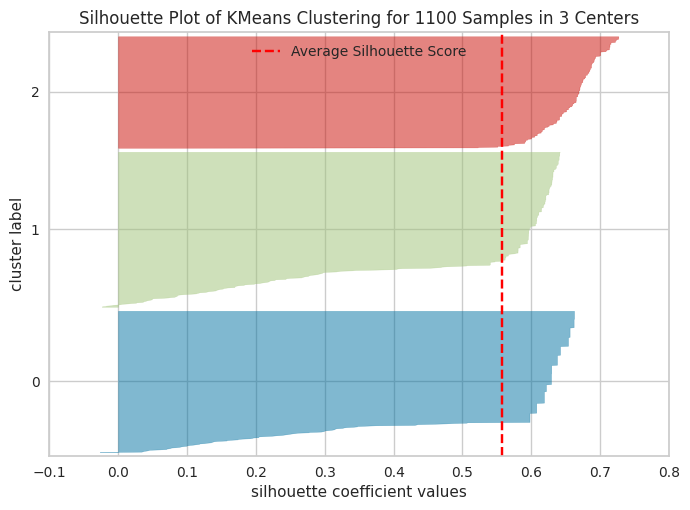

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:

# Install necessary libraries for clustering visualizations
!pip install kneed yellowbrick
# Import necessary libraries
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=45)  # Random state for reproducibility
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick') # Initialize the SilhouetteVisualizer
# Fit the visualizer to the scaled data (df_scaled) and display the silhouette plot
visualizer.fit(df_scaled)
visualizer.show()



In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data (from your previous steps)
X = df_scaled

# Perform k-means clustering with k=3 (based on your analysis)
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
kmeans.fit(X)
# Get the cluster labels for each data point after fitting the model
labels = kmeans.labels_

# Compute the Within-Cluster Sum of Squares (WSS), which measures how compact the clusters are.
# This is calculated as the sum of squared distances between data points and their respective centroids.
wss = kmeans.inertia_

# Compute the Average Silhouette Score, which assesses the quality of clustering
# Higher values (closer to 1) indicate well-separated clusters, while negative values suggest poor clustering.
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 1563.3293320237235
Average Silhouette Score: 0.5569280455512305


The average Silhouette Score is 0.5569, indicating that the clusters are reasonably separated but there may be some overlap between points in different clusters.

The WSS value is about 1563.33, indicating that the points within each cluster are moderately close.

# K = 4

In [79]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=45, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the cluster centers (centroids) of the 4 clusters
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
# Print the labels for each data point, indicating which cluster each data point belongs to
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 1.06884693 -0.15028213  1.16246324 -1.06848231 -1.05480507]
 [-1.07155845  0.98198051 -1.0432046   1.17510763  1.19072503]
 [ 0.2463754  -1.41841629 -0.13137956 -0.12369554 -0.03742675]
 [-0.39599774  0.98198051  0.0921584  -0.07170711 -0.30449488]]

Cluster Labels:
[2 1 2 ... 0 1 1]



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

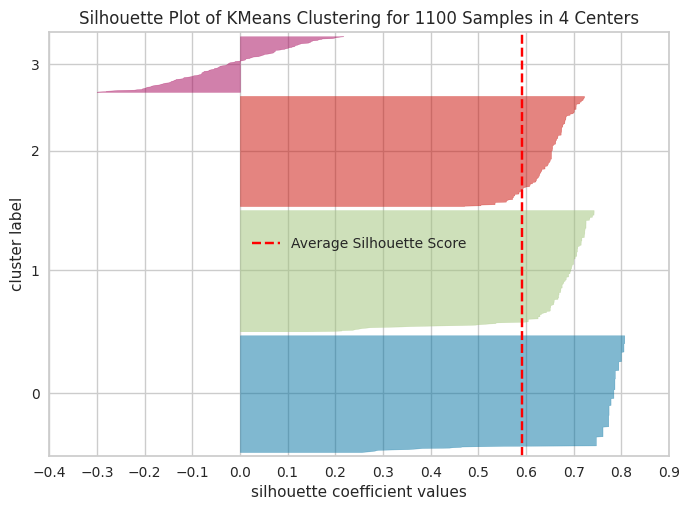

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1100 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:

# Install the required packages for visualizing the silhouette scores and clustering
!pip install kneed yellowbrick
# Import necessary libraries
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=45)  # Random state for reproducibility
# Initialize the SilhouetteVisualizer to visualize the silhouette score of the clustering model
# 'colors' argument defines the color scheme for the visualization
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# Fit the visualizer on the scaled data (df_scaled)
visualizer.fit(df_scaled)
# Display the silhouette visualization
visualizer.show()

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=4 (based on your analysis)
# 'n_init' is set to 'auto', which ensures the best initialization for stable results.
kmeans = KMeans(n_clusters=4, random_state=45, n_init='auto')
kmeans.fit(X)
# Get the cluster labels for each data point after fitting the KMeans model.
labels = kmeans.labels_

# Compute the Within-Cluster Sum of Squares (WSS), which measures how compact the clusters are.
# Lower values indicate that the points are more tightly clustered around the centroids.
wss = kmeans.inertia_

# Compute the Average Silhouette Score, which evaluates both the cohesion (how similar points are within a cluster)
# and the separation (how distinct the clusters are from each other).
# Scores closer to 1 indicate well-separated clusters, while negative values suggest overlap.
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 1184.5678169269129
Average Silhouette Score: 0.591095806851136


The Silhouette Score value is 0.5911, which is higher than the previous value (0.5569), indicating that the clusters are better separated and more homogeneous in this analysis.

The WSS value is 1184.57, which is lower than the previous value (1563.33), which means that the clusters in this case are more homogeneous and cohesive compared to the previous analysis.
# K = 5

In [82]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=5, random_state=45, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the cluster centers (centroids) of the 5 clusters
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
# Print the labels of the clusters assigned to each data point
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 1.06943686 -0.15744835  1.16434078 -1.06841722 -1.05479207]
 [-1.0876475   0.98198051 -1.07459326  1.19443506  1.19357164]
 [ 0.2463754  -1.41841629 -0.13137956 -0.12369554 -0.03742675]
 [-0.50442531  0.98198051  1.03861477  0.33604139 -0.091833  ]
 [-0.26188321  0.98198051 -0.94831853 -0.46654201 -0.37824321]]

Cluster Labels:
[2 1 2 ... 0 1 1]



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

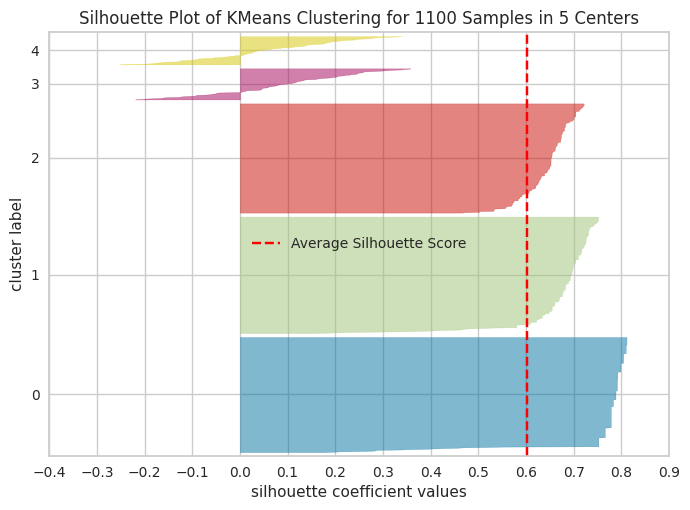

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1100 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:

# Install the necessary packages (kneed and yellowbrick) if they are not already installed
!pip install kneed yellowbrick
# Import the SilhouetteVisualizer from yellowbrick and KMeans from scikit-learn
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Perform K-means clustering with K=5 clusters
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=45)  # Random state for reproducibility
# Create a SilhouetteVisualizer to evaluate the quality of the clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# Fit the visualizer to the scaled data (df_scaled) and display the silhouette plot
visualizer.fit(df_scaled)
visualizer.show()

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data
X = df_scaled

# Initialize and fit the KMeans model with k=5 clusters.
# # 'n_init' specifies the number of times the algorithm will run with different centroid seeds.
# Setting 'n_init' to 'auto' ensures it selects a reliable initialization method.
kmeans = KMeans(n_clusters=5, random_state=45, n_init='auto')
kmeans.fit(X)
# Get the cluster labels for each data point.
# Each label indicates which cluster the corresponding data point belongs to.
labels = kmeans.labels_

# Calculate the Within-Cluster Sum of Squares (WSS).
 # WSS measures the total squared distance between each data point and its cluster's centroid.
# how compact the clusters are.
# Lower WSS indicates more compact clusters.
wss = kmeans.inertia_


# Calculate the Average Silhouette Score.
# This score measures how well each point is assigned to its cluster compared to other clusters.
# Values range from -1 to 1:
#   - Close to 1: Well-separated clusters.
#   - Close to 0: Overlapping clusters.
#   - Negative: Incorrect clustering.
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics: WSS and Average Silhouette Score.
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 1002.1736709966773
Average Silhouette Score: 0.6022920828329283


The Silhouette Score value is 0.6023, which is higher than the previous values ​​(0.5911 and 0.5569), indicating that the clusters are more well separated and the separation of points within clusters has become better.

The WSS value is 1002.17, which is lower than the previous values ​​(1563.33 and 1184.57), indicating that the clusters in this analysis are more homogeneous and that the points within the clusters are closer to the cluster centers.


#Evaluate the best models of Clustring:

 ##Average Silhouette Score:
Definition: Measures how well-defined clusters are by comparing the similarity of points within the same cluster to points in other clusters. Higher values indicate better-separated clusters.
Computed Values:
k=5: 0.6023 (the highest value, indicating the most well-defined clusters).
k=4: 0.5911 (slightly lower than k=5k = 5k=5, but still relatively high).
k=3: 0.5569 (the lowest, indicating less distinct clusters).

## Within-Cluster Sum of Squares (WSS):
Definition: Measures cluster compactness by calculating the sum of squared distances between each data point and its cluster centroid. Lower values indicate tighter clusters.
Computed Values:
k=5: 1002.17 (the lowest value, indicating the most compact clusters).
k=4: 1184.57 (higher than k=5k = 5k=5, indicating less compact clusters).
k=3: 1563.33 (the highest value, indicating the least compact clusters).

##Conclusion:
Based on the metrics:
Average Silhouette Score: k=5k = 5k=5 achieves the highest score (0.60230.60230.6023), indicating the best cluster separation.
WSS: k=5k = 5k=5 has the lowest value (1002.171002.171002.17), showing the most compact clusters.
Selection: k=5k = 5k=5 is chosen as the optimal number of clusters because it balances well-defined clusters (high silhouette score) with compact grouping (low WSS), making it the best configuration for this dataset.
